# Opis (Description)

**Author: Adam Szczepaniak**

**Date: 2024-10-08**

**Heart disease classification**

This project has been made during Polish-Japanese Academy of Information Technology postgraduate studies

In [935]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importy (Imports)

In [936]:
#ignore warnings
import warnings   #biblioteka ostrzeżeń, dzięki temu nie będą się wyświetlać ostrzeżenia
warnings.simplefilter ('ignore')

#trans libs
import pandas as pd
import numpy as np

#visualisation libs
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

#ML libs
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn. impute import SimpleImputer
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_recall_curve, precision_score, recall_score, f1_score, \
    roc_auc_score, log_loss, confusion_matrix, classification_report, roc_curve, auc, make_scorer, mean_squared_error

#setup pandas
pd.set_option ('display.width',100)
pd.set_option ('display.max_rows',50)
pd.set_option ('display.max_columns',20)

#setup seaborn
sns.set_style ('whitegrid')
sns.set_context ('paper', font_scale = 1.2)

#setup matplotlib
mpl.rcParams['font.family'] ='serif'
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['figure.figsize'] = (12, 8)
mpl.rcParams['figure.titlesize'] = 15
mpl.rcParams['figure.titleweight'] = 'semibold'

# Odczyt danych (Read data)

In [937]:
df = pd.read_csv ('/content/drive/MyDrive/Colab Notebooks/Heart/heart.csv')
df = df.copy()
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


# Rzut okiem na dane (First sight of data)

In [938]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


## Statystyki (Statistics)

### Statystyki dla danych numerycznych (Numerical data description)

In [939]:
num_stats = df.describe()
num_stats

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### Statystyki dla danych kategorycznych (categorical data description)

In [940]:
cat_stats = df.describe (exclude = np.number)
cat_stats.loc ['top %'] = np.round ((cat_stats.loc['freq'] / cat_stats.loc['count']).astype('float64'),4)
cat_stats

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460
top %,0.7898,0.5403,0.6013,0.5959,0.5011


### Wartości przyjmowane przez dane nieliczbowe (Non-numerical data values)

In [941]:
for i in cat_stats.columns:
    print(f"Kolumna: {i}\n{df[i].unique()}")

Kolumna: Sex
['M' 'F']
Kolumna: ChestPainType
['ATA' 'NAP' 'ASY' 'TA']
Kolumna: RestingECG
['Normal' 'ST' 'LVH']
Kolumna: ExerciseAngina
['N' 'Y']
Kolumna: ST_Slope
['Up' 'Flat' 'Down']


### Sprawdzenie występowania wartości pustych w zbiorze (Empty values check)


In [942]:
df.isnull().any()

,0
Age,False
Sex,False
ChestPainType,False
RestingBP,False
Cholesterol,False
FastingBS,False
RestingECG,False
MaxHR,False
ExerciseAngina,False
Oldpeak,False


Brak wartości pustych w zbiorze.

### Sprawdzenie występowania duplikatów w zbiorze (Duplicates check)

In [943]:
f"Ilość duplikatów: {df.duplicated().sum()}"

'Ilość duplikatów: 0'

## Opis danych (Data description)

- **Dane ilościowe (Quantitative data):**


**Age**  - **Wiek**, mierzony w latach. Im wyższy wiek, tym większe prawdopodobnieństwo występowania chorób serca. Rozkład wartości w analizowanym zbiorze danych znajduje się w przedziale **28- 77** lat. Zbiór wartości **int64**.

**RestingBP** -  **Spoczynkowe ciśnienie krwi**, mierzone w mmHg. Zbiór zabiera górne wartości ciśnienia krwi. Im wyższa wartość, tym większe prawdopodobnieństwo występowania chorób serca. Typowe wartości w mmHg: Normal: <120, Elevated: 120-139, High_blood_pressure_1: 140-159, High_blood_pressure_2: 160-179, High_blood_pressure_3: >180. Uznaje się, że ciśnienie krwi dorosłego człowieka powinno wynosić: do 65 roku życia: 120-129/70-79 mmHg; od 65 do 80 roku życia: 130-139/70-79 mmHg. Wartości powyżej norm mogą wskazywać na ryzyko powikłań układu krążenia. Wartości poniżej 100 mmHg uznaje się za niskie ciśnienie krwi, bez związku z chorobami serca. W analizowanym zbiorze wartości rozkładają się w przedziale **0 - 200** mmHg. **Wartości = 0 są wartościami nieprawidłowymi i wymagają odpowiedniego przetworzenia**. Zbiór zawiera wartości **int64**.

**Cholesterol** - **Cholesterol całkowity**, mierzony w mg/dl. Im wyższy poziom cholesterolu, tym większe prawdopodobnieństwo występowania chorób serca. Kwalifikacja poziomów cholesterolu w mg/dl: Optimal <200, Elevated 200-240, High >240. Wartości powyżej 200 wskazują odpowiednio na umiarkowane (Elevated) i wysokie (High) ryzyko wystąpienia chorób serca. W analizowanym zbiorze wartości rozkładają się w przedziale **0 - 603** mg/dl. **Wartości = 0 są wartościami nieprawidłowymi i wymagają odpowiedniego przetworzenia**. Zbiór zawiera wartości **int64**.

**MaxHr** - **Tętno maksymalne (wysiłkowe)**, jednostka- uderzenia serca na minutę (bpm). Określa nawyższą wartość tętna uzyskaną przy najwyższym wysiłku organizmu. Jego orientacyjną prawidłową wartość oblicza się ze wzoru MaxHr = 220 - Age u mężczyzn, MaxHr = 226 - Age u kobiet. Wartości tych nie powinno się przekraczać. W analizowanym zbiorze wartości rozkładają się w przedziale **60 - 202**. Zbiór zawiera wartości **int64**.

**Oldpeak** - **EKG wysiłkowe**. Jest to obniżenie odcinka ST podczas wysiłku w porównaniu do spoczynku, mierzone w mm. Może przyjmować wartości 0- brak obniżenia- serce nie wykazuje oznak niedokrwienia, 0-1 - niewielkie obniżenie, może wskazywać na łagodne problemy, ale niekoniecznie na poważną chorobę, 1-2 - umiarkowane obniżenie- ryzyko choroby wieńcowej, >2 - znaczne obniżenie- istotne problemy z ukrwieniem serca i może wskazywać na chorobę wieńcową. Wartości ujemne mogą wskazywać na podwyższenie odcinka ST podczas wysiłku w porównaniu do spoczynku, co może się wiązać z przeciążeniem serca, wcześniejszymi zawałami lub innymi schorzeniami takimi jak zapalenie mięśnia sercowego czy wady zastawkowe. W analizowanym zbiorze wartości rozkładają się w przedziale **-2.60 - 6.20**. Zbiór zawiera wartości **float64**.

- **Dane jakościowe (Qualitative data):**


**Sex** - **Płeć**. Zmienna dychotomiczna (dichotomus). Przyjmuje 2 wartości **M**-mężczyzna, **F**- kobieta. W zbiorze większość danych dotyczy mężczyzn. Wartości typu **object**. Kolumna wymaga zakodowania.

**ChestPainType** - **Rodzaj bólu w klatce piersiowej**. Zmienna nominalna (nominal). Przyjmuje 4 wartości: **ATA**- (Atypical Angina): Nietypowy ból dławicowy, zwykle związany z wysiłkiem fizycznym lub stresem, w wyniku przejściowego niedokrwienia serca. Nawracający może oznaczać chorobę wieńcową. **NAP**- (Non-Anginal Pain): Ból, który nie spełnia kryteriów dławicy piersiowej. **ASY**- (Asymptomatic Angina): Atypowy ból dławicowy, który nie pasuje do klasycznych objawów dławicy, może być związany z chorobami serca (najczęściej występujący w zbiorze). **TA**- (Typical Angina): Typowy ból dławicowy, może oznaczać chorobę wieńcową. Wartości typu **object**. Kolumna wymaga zakodowania.

**FastingBS** - **Poziom cukru**, wartości w mg/dl. Zmienna dychotomiczna (dichotomous). Przyjmuje dwie wartości: **0**- poziom cukru <120mg/dl, **1**- poziom cukru >120 mg/dl. Poziom powyżej 120 oznacza ryzyko cukrzycy, a tym samym problemów z sercem. Zbiór zawiera wartości **int64**. Kolumna nie wymaga kodowania.

**RestingECG** - **EKG spoczynkowe**. Zmienna porządkowa (ordinal). Przyjmuje trzy wartości: **Normal** (najczęściej występująca w zbiorze), **ST**- odcinek odpowiadający początkowej fazie repolaryzacji serca, może sugerować możliwość wystąpienia komplikacji kardiologicznych w przyszłości; **LVH**- przerost lewej komory serca (left ventricular hypertropy)- wzrost ryzyka niewydolności serca i ostrych incydentów wieńcowych. Zbiór zawiera wartości **object**. Kolumna wymaga zakodowania.

**ExerciseAngina** - **ból po wysiłku**. Zmienna dychotomiczna (dichotomous). Przyjmuje dwie wartości: **N** - nie występuje (najczęściej występująca w zbiorze), **Y**- występuje. Jeden z najważniejszych objawów chorób serca.  Zbiór zawiera wartości **object**. Ponieważ **kolumna** przyjmuje wartości typu True/False (bool), to **wymaga przetworzenia do wartości 0/1**.

**ST_Slope** - **kierunek odcinka wysiłkowego ST**. Zmienna porządkowa (ordinal). Przyjmuje 3 wartości : Flat, Up, Down. **Flat**- nie daje jednoznacznych informacji o ukrwieniu, jednak może sugerować chorobę (najczęściej występująca w zbiorze); **Up**- uniesienie sugeruje brak niedokrwienia; **Down**- obniżenie jest objawem choroby niedokrwiennej serca. Zbiór zawiera wartości **object**. Kolumna wymaga zakodowania.

**HeartDisease** - **Wystąpienie choroby serca** Zmienna dychotomiczna (dichotomous). Przyjmuje dwie wartości: **0**- choroba nie wystąpiła, **1**- choroba wystąpiła (kolumna już została zakodowana). Zbiór zawiera wartości **int64**. **ZMIENNA CELU (TARGET)**.


- **Wartości puste (Null values) i duplikaty (duplicates):**

W datasecie znajduje się 918 wierszy w 12 kolumnach. W datasecie nie ma wartości pustych, ani duplikatów.

## Podsumowanie (Summary)

1. W zbiorze danych znajduje się 918 wierszy w 12 kolumnach. Są to dane numeryczne (ilościowe) oraz zmienne dychotomiczne i porządkowe, bez duplikatów i wartości pustych.
2. Większość zmiennych jakościowych, poza **FastingBS** i **HeartDisease** nie zawiera wartości numerycznych
3. Kolumny **RestingPB** i **Cholesterol** mają nieprawidłowe wartości 0, które wymagają usunięcia i uzupełnienia. Uzupełnienie zostanie przeprowadzone medianą wartości.
4. Wartości kolumny **ExerciseAngina**, będące wartościami logicznymi, zostaną zmienione z wartości N/Y na 0/1.

## Usunięcie nieprawidłowych wartości z kolumn

In [944]:
#zmiana wartosci '0' na 'not a number (nan)' z pakietu numpy

df['Cholesterol'] = df['Cholesterol'].replace (0, np.nan)
df['RestingBP'] = df['RestingBP'].replace (0, np.nan)

df.info()
print()
print(df['Cholesterol'].isnull().any(), df['RestingBP'].isnull().any())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       917 non-null    float64
 4   Cholesterol     746 non-null    float64
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 86.2+ KB

True True


In [945]:
#uzupełnienie wartości nan medianą

NumericalImputer = SimpleImputer (strategy = 'median')
NumericalImputer.fit(df[['RestingBP', 'Cholesterol']])
df[['RestingBP', 'Cholesterol']] = NumericalImputer.transform(df[['RestingBP', 'Cholesterol']])

#sprawdzenie poprawności wykonanych działań

print((df['Cholesterol'] == 0).any(), df['Cholesterol'].isnull().any())
print((df['RestingBP'] == 0).any(), df['RestingBP'].isnull().any())

False False
False False


In [946]:
#zamiana wartości kolumny ExerciseAngina na wartości numeryczne

mapper = {'N' : 0, 'Y' : 1}
df['ExerciseAngina'] = df['ExerciseAngina'].map (mapper).astype ('int8')

#sprawdzenie poprawności wykonanej zmiany wartości
df['ExerciseAngina'].value_counts()

,count
ExerciseAngina,
0,547
1,371


# Eksploracyjna analiza danych (EDA- Exploratory Data Analysis)

In [947]:
#zastosowanie palety kolorów 'Paired'

cols = df.columns.to_list()
palette = sns.color_palette("Paired").as_hex()

#słownik kolumn oraz przyporządkowanych do nich kolorów

colors = dict(zip (cols, palette))

#słownik kolumn i przyporządkowanych im jednostek lub dopuszczalnych wartości

units = {'Age': 'Years', 'Sex': ('F/M'), 'ChestPainType': ('NAP/ATA/ASY/TA'),
         'RestingBP': 'mmHg', 'Cholesterol': 'mg/dl',
         'FastingBS': 'BS<120 mg/dl//BS>120 mg/dl - 0/1', 'RestingECG': 'Normal/ST/LVH',
         'MaxHR': 'bpm', 'ExerciseAngina': 'N/Y - 0/1', 'Oldpeak': 'mm',
         'ST_Slope': 'Up/Flat/Down', 'HeartDisease': 'N/Y - 0/1'}

In [948]:
#funcja tworząca histogram i boxplot lub countplot dla pojedyńczej kolumny
def hist_box(x):

    #countplot
    if len(x.unique()) >= 2 and len(x.unique()) <= 6:

        #obliczenie statystyk dla zmiennej

        count = int(len(x))
        unique = int(len(x.unique()))

        values_amount = x.value_counts().to_frame().rename(columns = {'count':'amount'})
        values_percentage = round(((values_amount / count)* 100), 1).rename(columns = {'amount':'%'})

        x_desc = pd.Series({'count':count, 'unique':unique,'values':units.get(x.name)}).to_frame(name = x.name).transpose()
        x_val_desc = pd.concat([values_amount, values_percentage], axis = 1)

        fig = plt.figure (figsize = (10,5))

        sns.countplot(x = x,
                  width = 0.5,
                  color = colors.get(x.name),
                  linewidth = 1,
                  alpha = 0.7,
                  edgecolor = 'black')

        plt.suptitle (f"Countplot visualisation for {x.name} column [{units.get(x.name)}]")
        plt.xlabel ('')

        plt.text(0.92, 0.68, f'{x_val_desc}', bbox = dict(facecolor = f'{colors.get(x.name)}', edgecolor = 'black', alpha = 0.42),transform = plt.gcf().transFigure)
        #transform - transformuje układ figury do wartości bezwzględnej, okienka bbox są na każdym plocie
        #w tym samym miejscu

        plt.show()
        return x_desc
    else:
        cols = 2
        rows = 1

        #wyliczenie skośności i kurtozy dla analizowanej kolumny
        skew = round (x.skew(), 4)
        kurtosis = round (x.kurtosis(), 4)

        fig, axes = plt.subplots (nrows = rows, ncols = cols, figsize = (15, 5))
        axes = axes.flatten()

        #ustawienie ilosci binów = ilości wartości występujących w kolumnie dla tych, których ilość nie przekracza 60
        if len(x.unique()) > 60:
            discrete = False
        else:
            discrete = True

        sns.histplot(x,
                     ax = axes[0],
                     bins = 30,
                     stat = 'count',
                     kde = True,
                     color = colors.get(x.name),
                     discrete = discrete,  #ilość binów = ilości wartości w kolumnie
                     linewidth = 1,
                     edgecolor = 'black',
                     line_kws = {'linestyle':'dashed', 'linewidth':2, 'alpha':0.2})

        sns.boxplot(x, ax = axes[1], orient = 'h', color = colors.get(x.name), boxprops ={'edgecolor': "black", 'linewidth': 1.5}, medianprops = {'color': 'lightgreen','linewidth' : 2}, flierprops = {'markerfacecolor': 'red', 'marker': 'o', 'markersize': 4, 'markeredgecolor' : 'red'})

        plt.suptitle(f"Histogram and Boxplot visualisation for {x.name} column [{units.get(x.name)}]")
        axes[0].set_xlabel('')

        #okienko z wyliczeniem skośności i kurtozy:
        plt.text(0.37, 0.75, f'Skew:     {skew}\nKurtosis: {kurtosis}', bbox = dict(facecolor = f'{colors.get(x.name)}', edgecolor = 'black',alpha = 0.5),transform = plt.gcf().transFigure)
        #transform-transformuje układ figury do wartości bezwzględnej, okienka bbox są na każdym plocie
        #w tym samym miejscu

        plt.show()

        #wiersz z analizą danych + RSD
        #RSD (relatywne odchylenie standardowe)- wartość w %, oznacza rozrzut wyników w stosunku do średniej.
        #Wynik jest wyrażony w procentach - niski procent oznacza, że rozrzut wyników jest niewielki (do ok. 30%),
        #podczas gdy wyższa wartość wskazuje na duży rozrzut wyników.

        x_desc = x.describe().to_frame().transpose()
        x_desc['RSD'] = np.round ((x.std() / x.mean()) * 100.0, 2)
        return x_desc

## Analiza Univariate

Analiza univariate to analiza rozkładu i cech poszczególnych zbiorów danych.

- Dla **danych ilościowych** zostaną przedstawione histogramy w celu ukazania charakterystycznych cech rozkładu danych w kolumnach, w tym skośności i kurtozy, oraz boxploty, pozwalające na detekcję wartości odstających (outliers), wizualizacji rozkładu i tendencji. Dodatkowo cechy statystyczne poszczególnych kolumn zostaną zestawione w formie tabelarycznej.
- Dla **danych jakościowych** zostaną stworzone countploty, pozwalające na zliczenie poszczególnych wartości. Dodatkowo w tabelach zostanie zestawione: ilość całkowita, ilość wartości unikalnych, występujące wartości oraz procentowy udział poszczególnych wartości w zbiorze.

### Dane ilościowe (Quantitative data)

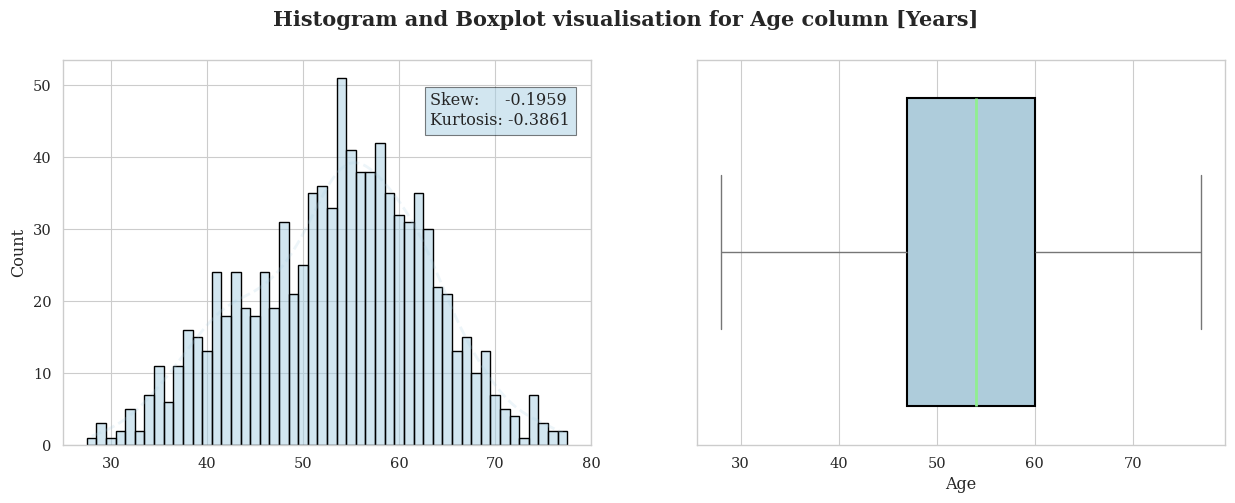

,count,mean,std,min,25%,50%,75%,max,RSD
Age,918.0,53.510893,9.432617,28.0,47.0,54.0,60.0,77.0,17.63


In [949]:
hist_box(df['Age'])

**Age** - Wartości znajdują się między (min) 28 lat i (max) 77 lat. Wartości wyglądają wiarygodnie. Wartość średnia (mean) 53.51 jest zbliżona do mediany (50%)- 54.00, co oznacza, że rozkład zmiennych jest zbliżony do rozkładu normalnego (Gaussa), z minimalnie wydłużonym lewym ogonem rozkładu (skośność (skew) -0.20 < 0) i minimalnie mniejszą intensywnością wartości skrajnych (kurtoza (kurtosis -0.39 < 0) niż rozkład normalny.  Odchylenie standardowe (std) 9.43 oraz wartość RSD 17.63% oznacza, że dane są w małym stopniu rozrzucone wokół średniej. W kolumnie nie ma wartości odstających (outliers)-wartości mieszczą się między dolnym i górnym zakresem 1.5 IQR.

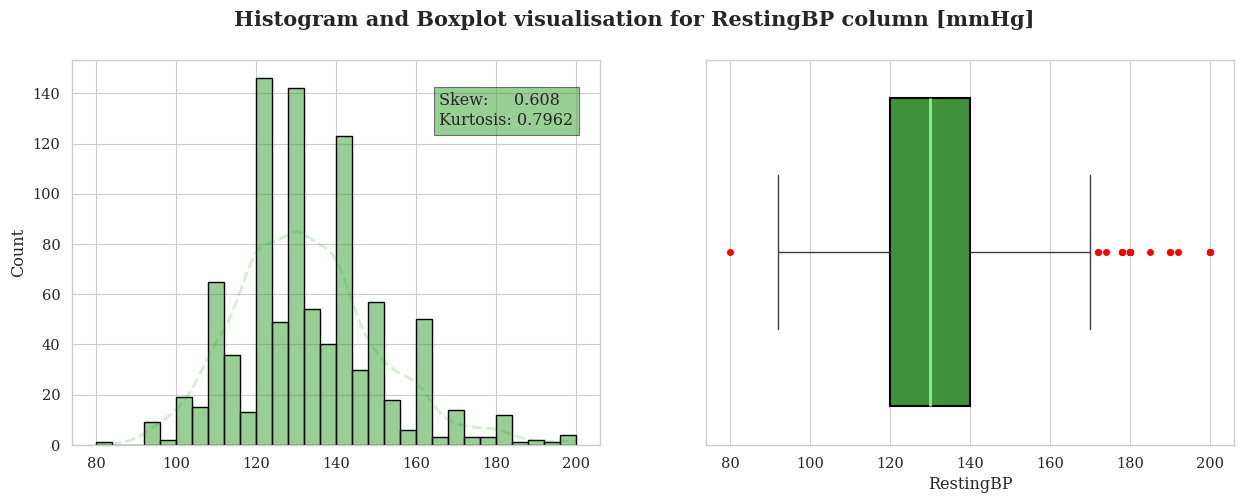

,count,mean,std,min,25%,50%,75%,max,RSD
RestingBP,918.0,132.538126,17.990127,80.0,120.0,130.0,140.0,200.0,13.57


In [950]:
hist_box (df['RestingBP'])

**RestingBP**- Wartości znajdują się w zakresie od (min) 80.0 do (max) 200.0. Wartość średnia (mean) 132.54 jest zbliżona do mediany (50%) 130.0, co oznacza, że rozkład wartości jest zbliżony do rozkładu normalnego (Gaussa). Skośność (skew) na poziomie 0.60 oznacza, że rozkład jest prawostronny. Kurtoza (kurtosis) 0.80 oznacza, że wartości skrajne przyjmują nieco wieksze wartości, niż wynikałoby to z rozkładu normalnego. Odchylenie standardowe (std) 17.99 i RSD 13.57% oznacza, że dane są w niewielkim stopniu rozrzucone wokół średniej. W kolumnie znajduje się pewna ilość wartości odstających, znajdujących się poza zakresem +/- 1.5 IQR, wymagających przetworzenia.

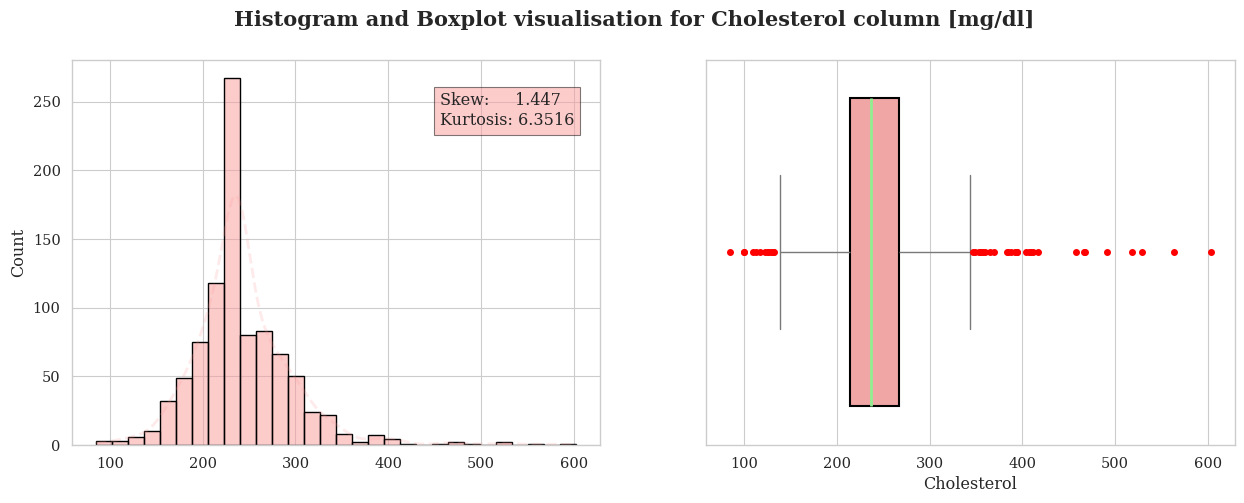

,count,mean,std,min,25%,50%,75%,max,RSD
Cholesterol,918.0,243.204793,53.401297,85.0,214.0,237.0,267.0,603.0,21.96


In [951]:
hist_box (df['Cholesterol'])

**Cholesterol** - Wartości rozkładają się w przedziale od 85.0 do 603.0. Wartość średnia (mean) 243.2 jest zbliżona do mediany (50%) 237.0, więc rozkład jest zbliżony do rozkładu normalnego (Gaussa). Rozkład jest prawostronnie asymetryczny (skośność (skew) 1.45), intensywność wartości skrajnych jest większa niż w przypadku rozkładu normalnego (kurtoza (kurtosis) 6.35). Odchylenie standardowe (std) 53.40 i wskaźnik RSD 21.96 sugerują dość duży rozrzut wartości od średniej. W kolumnie znajduje się duża ilość wartości odstających (outliers), znajdujących się poza zakresem +/- 1.5 IQR, wymagających przetworzenia.


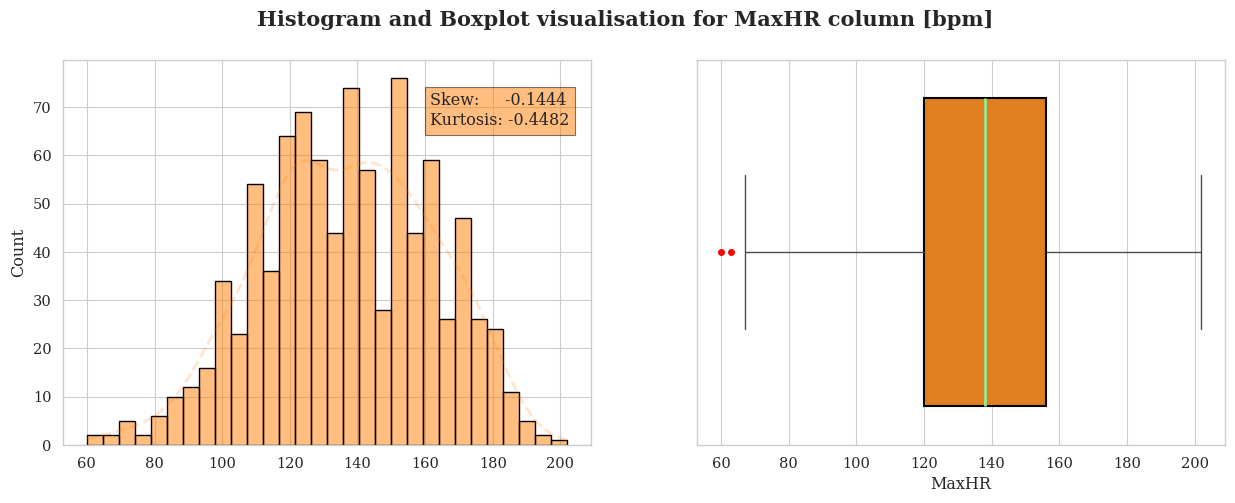

,count,mean,std,min,25%,50%,75%,max,RSD
MaxHR,918.0,136.809368,25.460334,60.0,120.0,138.0,156.0,202.0,18.61


In [952]:
hist_box (df['MaxHR'])

**MaxHR**- Wartości rozkładają się w przedziale od (min) 60.0 do (max) 202.0. Wartości wyglądają realistycznie. Wartość średnia (mean) jest zbliżona do mediany (50%), co oznacza, że rozkład jest zbliżony do rozkładu normalnego (Gaussa), z minimalną asymetrią lewostronną (skośność (skew) -0.14) i z minimalnie mniejszymi wartościami na skrajach rozkładu (kurtoza (kurtosis) -0.44), niż wynikałoby to z rozkładu normalnego. Odchylenie standardowe (std) 136.81 i wskaźnik RSD 18.61 sugerują zauważalny rozrzut wartości od średniej. W kolumnie znajduje się niewielka ilość wartości odstających (outliers), znajdujących się poza zakresem +/- 1.5 IQR, wymagających przetworzenia.

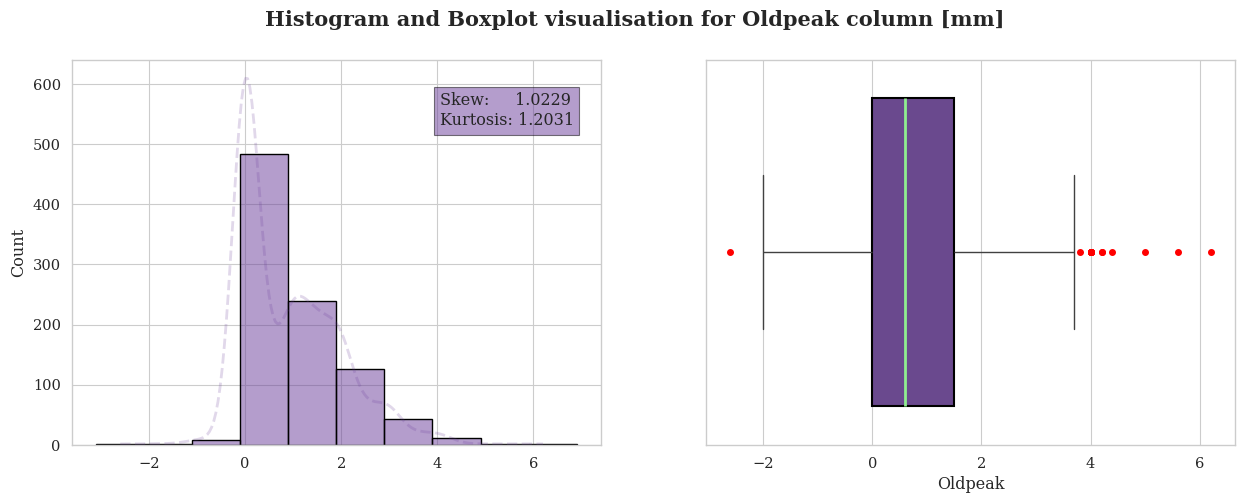

,count,mean,std,min,25%,50%,75%,max,RSD
Oldpeak,918.0,0.887364,1.06657,-2.6,0.0,0.6,1.5,6.2,120.2


In [953]:
hist_box (df['Oldpeak'])

**Oldpeak**- Przyjmuje wartości w przedziale od -2.6 (min), do 6.2 (max). Wartość średnia 0.89 (mean) jest wyższa od mediany (0.6), a skośność (skew) przyjmuje wartość 1.02 > 0, co oznacza że rozkład jest asymetryczny, prawostronny. Kurtoza (kurtosis) 1.20 oznacza, że rozkład jest leptokurtyczny (wartości skrajne rozkładu są większe, niż w rozkładzie normalnym. Wskaźnik RSD wskazuje na duży rozrzut wartości w stosunku do średniej. W kolumnie znajduje się pewna ilość wartości odstających, znajdujących się poza zakresem +/- 1.5 IQR, wymagających przetworzenia.

### Dane jakościowe (Qualitative data)

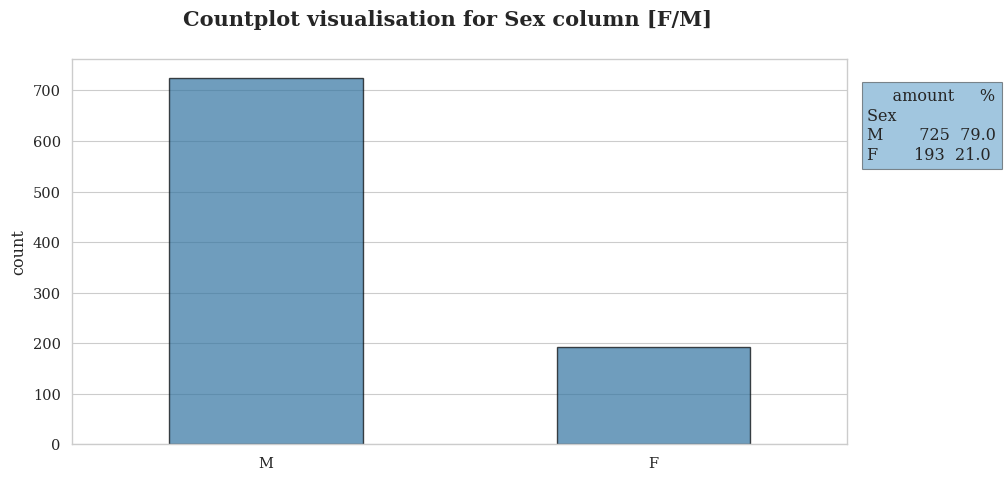

,count,unique,values
Sex,918,2,F/M


In [954]:
hist_box(df['Sex'])

**Sex**- Kolumna przybiera dwie wartości: M- Mężczyzna (Man), F- Kobieta (Female). W zbiorze znajduje się 725 (79.0%) rekordów reprezentujących mężczyzn i 193 (21.0%) rekordów reprezentujących kobiety. Dane wymagają zakodowania. W zbiorze mamy nadreprezentację mężczyzn.

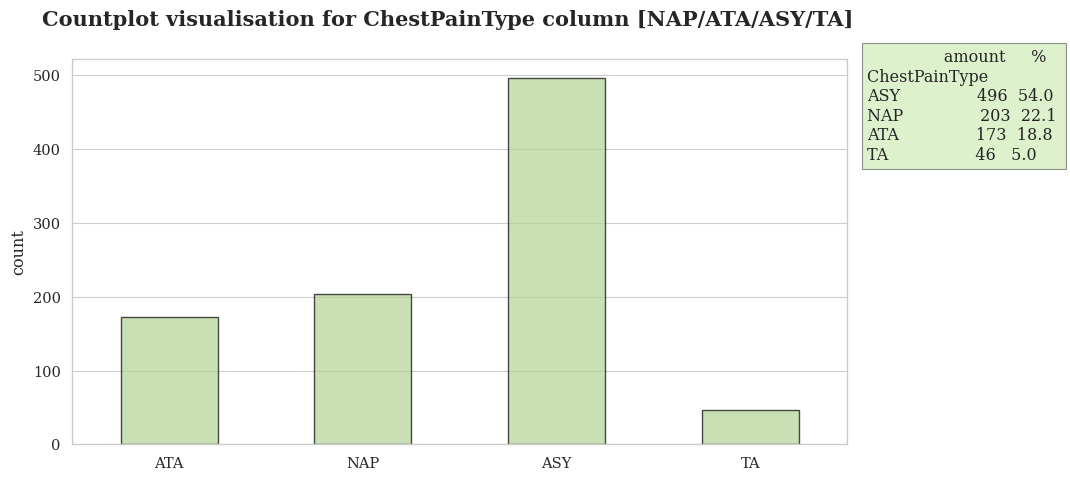

,count,unique,values
ChestPainType,918,4,NAP/ATA/ASY/TA


In [955]:
hist_box(df['ChestPainType'])

**ChestPainType**- Kolumna przybiera cztery wartości: ATA- Atypical Angina, NAP- Non-Anginal Pain, ASY- Asymptomatic Angina, TA- Typical Angina. W zbiorze najliczniej jest reprezentowana wartość ASY (496 rekordów, 54.0% wartości w kolumnie). Kolejną jest NAP- 203 rekordy i 22.1% wartości w kolumnie. Po niej ATA- 173 rekordy i 18.8% wartości w kolumnie. Najmniej licznie jest reprezentowana TA- 46 rekordów i 5.0% wartości w kolumnie. Kolumna wymaga zakodowania.

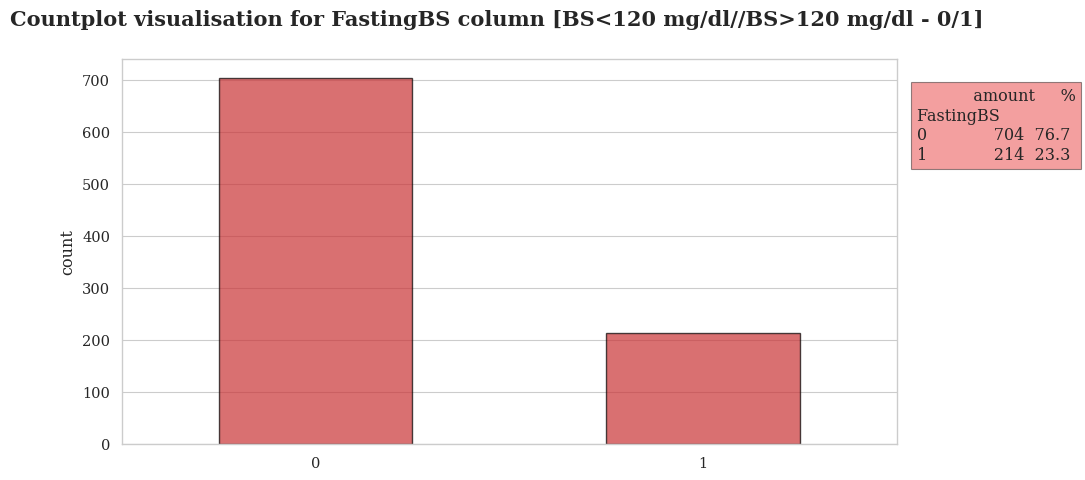

,count,unique,values
FastingBS,918,2,BS<120 mg/dl//BS>120 mg/dl - 0/1


In [956]:
hist_box(df['FastingBS'])

**FastingBS**- Kolumna zakodowana do dwóch wartości: 0- poziom cukru <120 mg/dl, 1- poziom cukru >120 mg/dl. W zbiorze większośc 704 (76.7%) rekordów reprezentuje prawidłowy poziom cukru, natomiast 214 (23.3%) rekordów reprezentuje podwyższony poziom cukru. Dane nie wymagają przetworzenia.

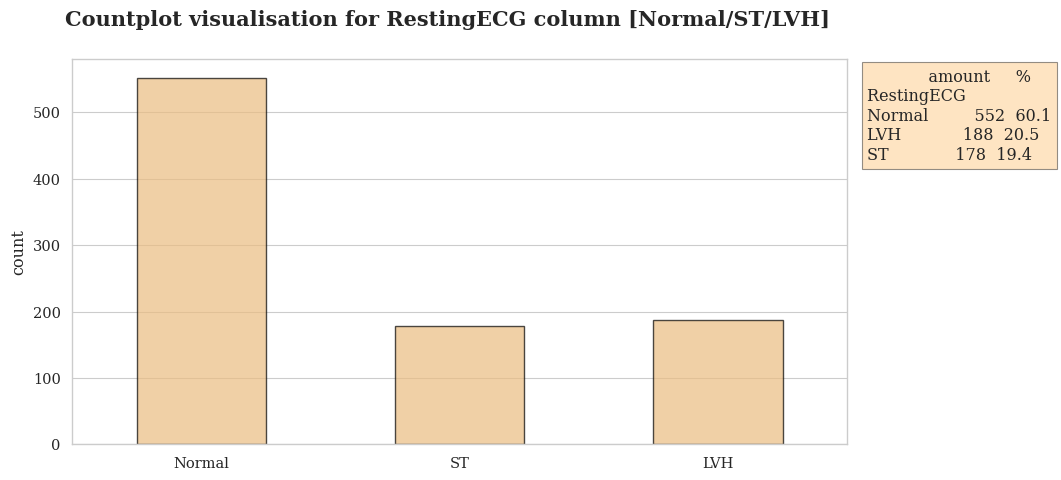

,count,unique,values
RestingECG,918,3,Normal/ST/LVH


In [957]:
hist_box(df['RestingECG'])

**RestingECG**- Kolumna przybiera trzy wartości: Normal- (najczęściej występująca w zbiorze, 552 rekordy, 60.1% wartości w kolumnie), LVH- 188 rekordów, 20.5% wartości w kolumnie ST- 178 rekordów i 19.4% wartości w kolumnie. Opis znaczenia poszczególnych wartości wykonano przy opisie danych. Kolumna wymaga zakodowania.

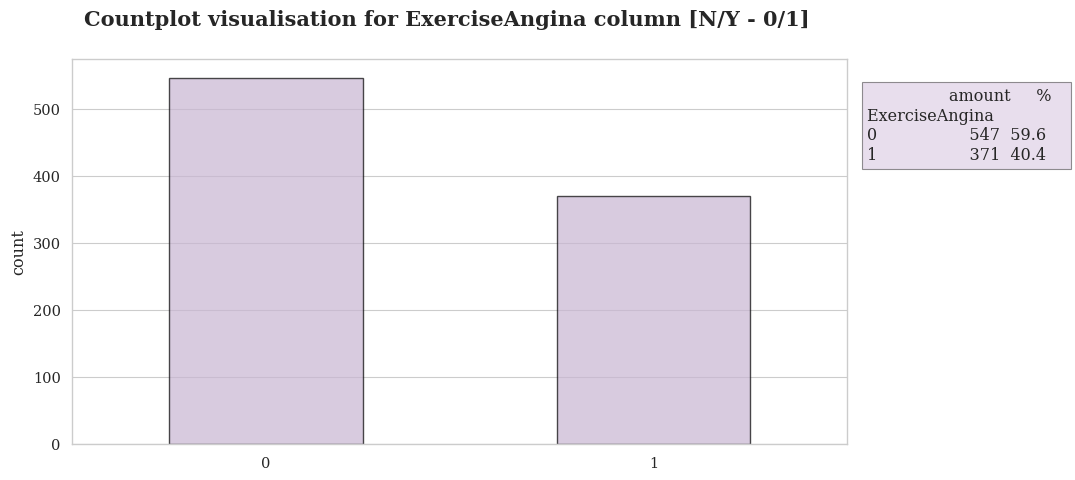

,count,unique,values
ExerciseAngina,918,2,N/Y - 0/1


In [958]:
hist_box(df['ExerciseAngina'])

**ExerciseAgnina**- kolumna przyjmuje dwie wartości: 0 (No)- ból nie wystąpił i 1 (Yes)- ból wystąpił. Wartość 0 występuje najczęściej, obejmuje 547 rekordów i 59.6% wartości w kolumnie, natomiast wartość 1- 371 rekordów i 40.4% wartości w kolumnie. Kolumna nie wymaga kodowania.

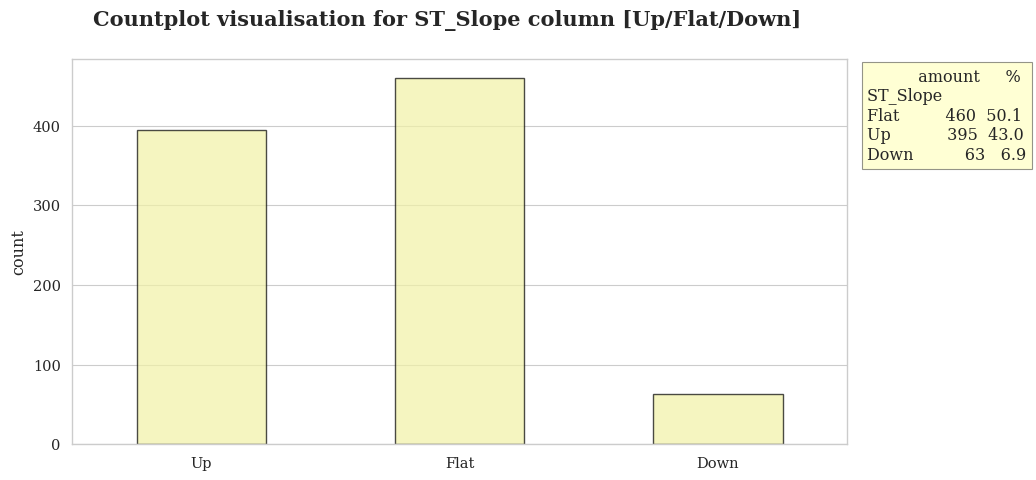

,count,unique,values
ST_Slope,918,3,Up/Flat/Down


In [959]:
hist_box(df['ST_Slope'])

**ST_Slope**- w kolumnie występują trzy wartości. Najczęściej występuje wartość Flat- 460 rekordów i 50.1% wartości w kolumnie. Kolejną jest wartość Up- 395 rekordów i 43.0% wartości w kolumnie. Ostatnią, najrzadziej reprezentowaną jest wartość Down- 63 rekordy i 6.9% wartości w kolumnie.Opis znaczenia poszczególnych wartości wykonano przy opisie danych. Kolumna wymaga zakodowania.

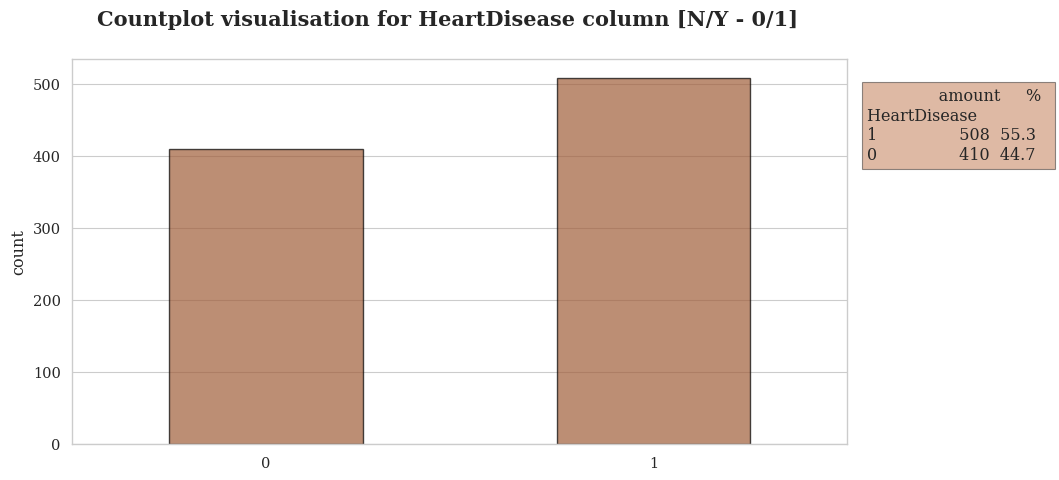

,count,unique,values
HeartDisease,918,2,N/Y - 0/1


In [960]:
hist_box(df['HeartDisease'])

**HeartDisease**- zmienna celu (Target). Kolumna zakodowana do dwóch wartości: 0- choroba nie wystąpiła, 1- choroba wystąpiła. W zbiorze znajduje się 410 (44.7%) rekordów o wartości 0 i 508 (55.3%) rekordów o wartości 1 (najczęściej występująca). Dane nie wymagają przetworzenia.

## Analiza Bivariate (Bivariate Analysis)

Analiza Bivariate polega na porównaniu poszczególnych zmiennych w odniesieniu do zmiennej celu (HeartDisase).
- Dla **danych ilościowych** będą to wykresy słupkowe (barplots) w celu ukazania średnich wartości zbiorów oraz wykresy gęstości prawdopodobieństwa KDE w celu ukazania rozkładu gęstości zmiennych.
- Dla **danych jakościowych** będą to wykresy słupkowe (countplots), które umożliwią porównanie liczby wystąpień każdej kategorii zmiennej jakościowej w grupach z chorobą serca i bez niej, co pozwoli na identyfikację kategorii, które mogą być powiązane z większym ryzykiem choroby.

### Dane ilościowe (Quantitative data):

In [961]:
df_num = ['Age', 'RestingBP', 'Cholesterol','MaxHR', 'Oldpeak']
df[df_num].head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
0,40,140.0,289.0,172,0.0
1,49,160.0,180.0,156,1.0
2,37,130.0,283.0,98,0.0
3,48,138.0,214.0,108,1.5
4,54,150.0,195.0,122,0.0


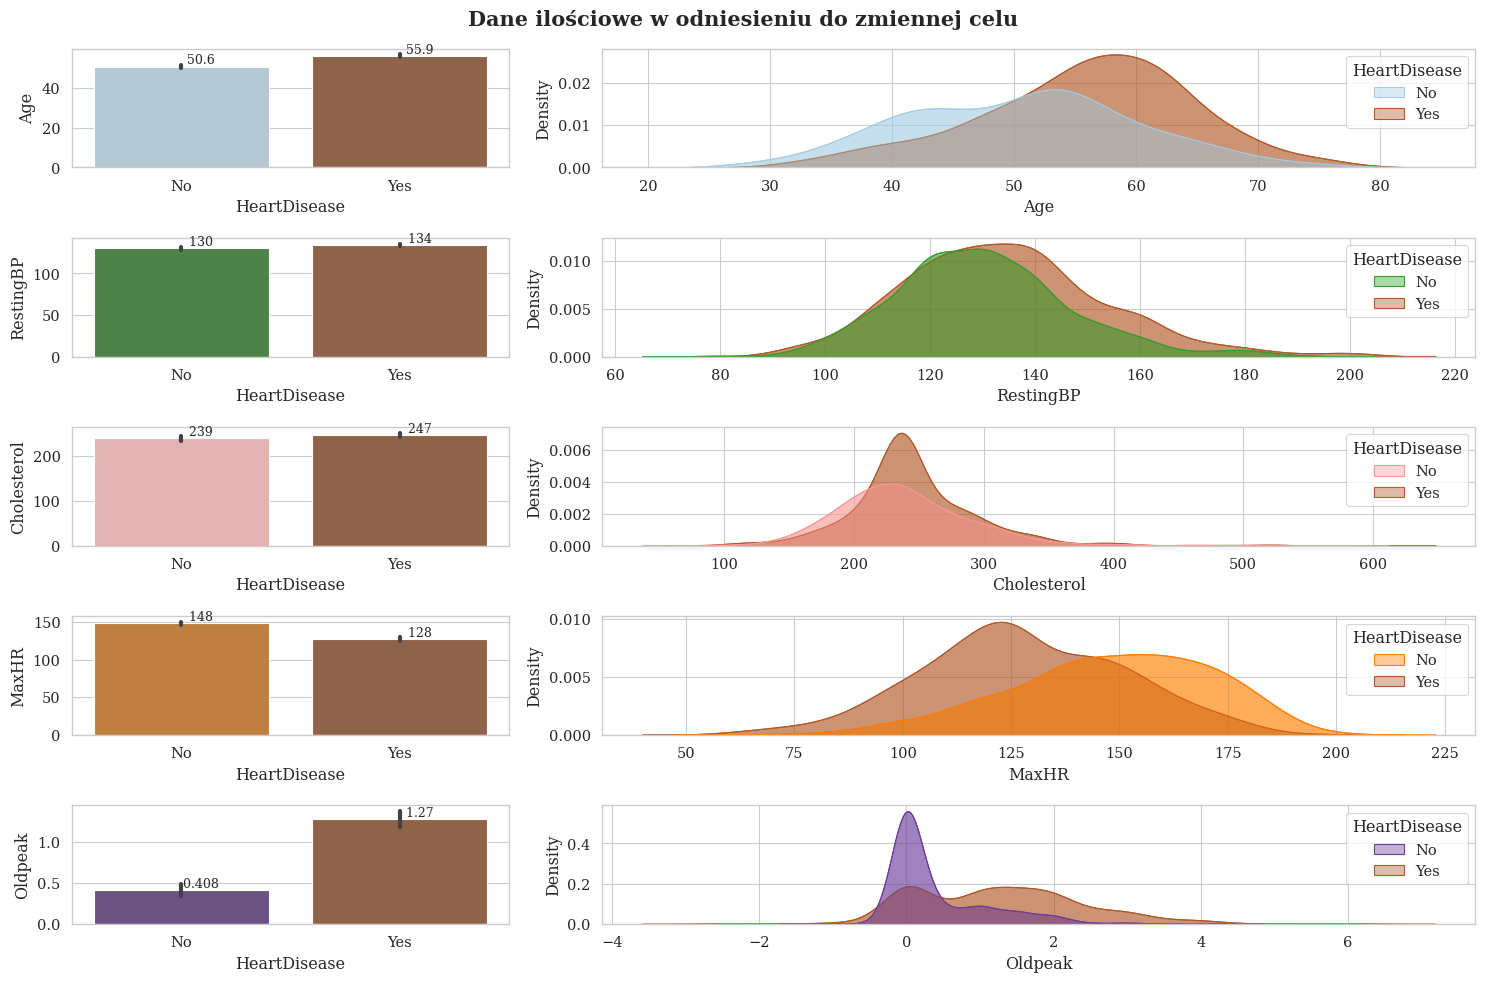

In [962]:
cols = 2
rows = len (df_num)

fig, axes = plt.subplots (nrows = rows,
                          ncols = cols,
                          figsize = (15, 10),
                          gridspec_kw = {'width_ratios': [1,2]}) #proporcje subplotów

for i, col in enumerate(df_num):
  ax_bar = axes [i, 0]
  ax_kde = axes [i, 1]
  bar = sns.barplot (data = df, x = 'HeartDisease', y = col, ax = ax_bar, palette = [colors[col], colors['HeartDisease']], saturation = 0.5)

  bar.set_xticks ([0,1], labels = ['No', 'Yes'])

  for cont in bar.containers:
    bar.bar_label(cont, fmt='          %.3g', fontsize = 9) #dodanie wartości średniej do barplotu

    kde = sns.kdeplot(data = df, x = col, hue = 'HeartDisease', palette = [colors[col], colors['HeartDisease']], ax = ax_kde, fill = True, alpha = 0.4)

    leg_kde = kde.get_legend()
    leg_kde.get_texts()[0].set_text("No")
    leg_kde.get_texts()[1].set_text("Yes")

plt.suptitle ("Dane ilościowe w odniesieniu do zmiennej celu")
plt.tight_layout()

plt.show()

**Opis:**
- **Age**- Średnia wieku osób, u których wystąpiła choroba serca jest wyższa (55.9), niż tych, u których choroba nie wystąpiła (50.6). Wykres KDE chorób serca jest przesunięty w prawo i pokazuje, że prawdopodobieństwo choroby serca wzrasta wraz z wiekiem i osoby chore koncentrują się w starszych grupach wiekowych. Z uwagi na widoczne różnice między rozkładami gęstości wiek może być istotnym czynnikiem predykcyjnym.
- **RestingBP**- Średnia ciśnienia w stanie spoczynku dla osób u których wystąpiła choroba jest zbliżona (134) do średniego ciśnienia krwi osób, u których choroba nie wystąpiła (130). Rozkłady gęstości KDE są zbliżone do siebie kształtem, z przesunięciem wystąpienia chorób serca nieco w prawą stronę. Podobne rozkłady gęstości sugerują, że ciśnienie spoczynkowe krwi może nie być istotnym predyktorem choroby serca w analizowanym zbiorze danych.
- **Cholesterol**- osoby z chorobą serca mają wyższy średni poziom cholesterolu (247), niż osoby bez choroby (239). Wykres KDE ukazuje szczyt wokół wartości 220-260, przy czym może to być efekt wypełnienia medianą wartości brakujących (0). Poziom cholesterolu może mieć pewne znaczenie przy przewidywaniu choroby serca, jednak ponieważ różnice nie są wyraźne, to przydatność tej zmiennej może być ograniczona.
- **MaxHR**- Tętno maksymalne wykazuje niższą wartość średnią (128) u osób z chorobą serca, niż bez (148). Rozkłady gęstości są wyraźnie oddzielone: osoby z chorobą częściej osiągają niższe wartości maksymalnego tętna (100-140), podczas gdy osoby bez choroby mają bardziej rozłożone wartości w wyższych zakresach (140-155). Maksymalne tętno jest wyraźnie związane z chorobą serca i może stanowić istotny czynnik predykcyjny. Niższe wartości MaxHR mogą sygnalizować większe ryzyko choroby serca.
- **Oldpeak**- Średnia wartość Oldpeak (wskaźnik obniżenia odcinka ST na EKG), jest wyraźnie wyższa dla osób z chorobą serca (1,27) niż dla osób bez choroby (0,408). Rozkład gęstości pokazuje, że osoby z chorobą serca częściej mają większe wartości Oldpeak (powyżej 0.6), a szczyt rozkładu dla osób bez choroby jest skupiony wokół niskich wartości (0).Oldpeak wydaje się być istotnym czynnikiem predykcyjnym. Wysokie wartości Oldpeak mogą wskazywać na wyższe ryzyko wystąpienia choroby serca.

**Podsumowanie:**

**Age**, **MaxHR** oraz **Oldpeak** wydają się być najbardziej istotnymi predyktorami choroby serca.
**Cholesterol** oraz **RestingBP** wykazują mniej wyraźne różnice, co może wskazywać, że ich znaczenie jako predyktorów może być ograniczone.

### Dane jakościowe (Qualitative data)

In [963]:

df_cat = ['Sex', 'ChestPainType','FastingBS', 'RestingECG', 'ExerciseAngina','ST_Slope']
df[df_cat].head()

,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,0,Normal,0,Up
1,F,NAP,0,Normal,0,Flat
2,M,ATA,0,ST,0,Up
3,F,ASY,0,Normal,1,Flat
4,M,NAP,0,Normal,0,Up


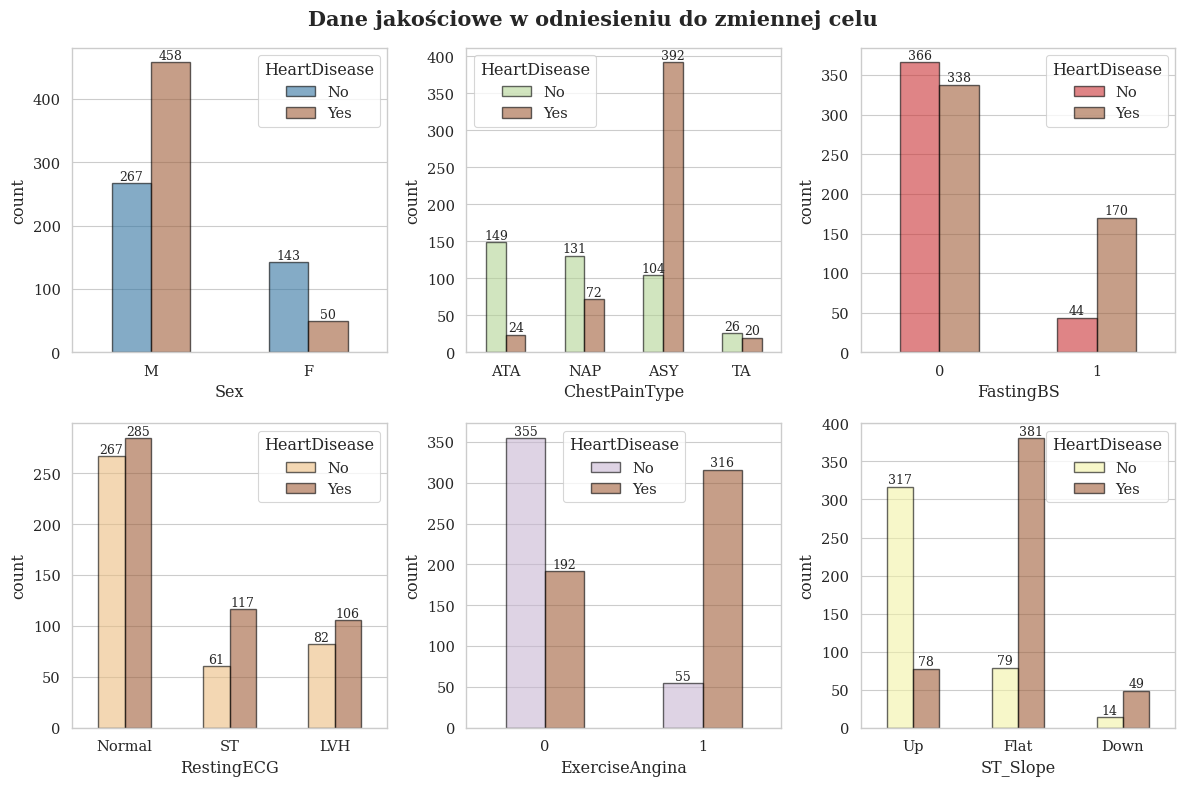

In [964]:
cols = 3
rows = 2

fig, axes = plt.subplots (nrows = rows,
                          ncols = cols,
                          figsize = (4 * cols, 4 * rows))
axes = axes.flatten()

for i, col in enumerate(df_cat):

  ax = axes [i]
  count = sns.countplot(x = df[col],
                ax = ax,
                hue = df['HeartDisease'],
                palette = [colors[col], colors['HeartDisease']],
                  width = 0.5,
                  #color = colors[col],
                  linewidth = 1,
                  alpha = 0.6,
                  edgecolor = 'black')

  leg_count = count.get_legend()
  leg_count.get_texts()[0].set_text("No")
  leg_count.get_texts()[1].set_text("Yes")

  for cont in count.containers:
    count.bar_label(cont, fontsize = 9) #dodanie wartości na słupkach

plt.suptitle ("Dane jakościowe w odniesieniu do zmiennej celu")
plt.tight_layout()

plt.show()

**Opis:**
- **Sex**- Mężczyźni częściej zapadają na choroby serca- 458 chorych (63%) w stosunku do 267 zdrowych. W przypadku kobiet mamy 50 (26%) chorych w stosunku do 143 zdrowych. Płeć może być istotnym czynnikiem predykcyjnym.

- **ChestPainType**- Typ bólu w klatce piersiowej jest ważnym wskaźnikiem ryzyka choroby serca. Najwięcej osób z chorobą serca- 392 (79%) występuje w kategorii ASY (atypowy ból dławicowy). Wśród osób bez choroby serca dominują typy ATA- typowy ból dławicowy (24 chorych w stosunku do 149 zdrowych) oraz NAP- nietypowy ból dławicowy (72 chorych w stosunku do 131 zdrowych).

- **FastingBS**- Osoby z wysokim poziomem cukru na czczo (> 120 mg/dl- 1) są częściej diagnozowane z chorobą serca (170- 79%) w porównaniu do tych bez choroby serca (44). W przypadku niskiego poziomu cukru mamy do czynienia mniej więcej z porównywalnymi wartościami (338 chorych i 366 zdrowych). Poziom cukru może więc być istotnym wskaźnikiem zwiększonego ryzyka choroby serca.

- **RestingECG**- Osoby z EKG spoczynkowym Normal są najczęściej diagnozowane z chorobą serca (285 chorych w stosunku do 267 zdrowych), przy czym proporcje są bardziej zbliżone do siebie niż w przypadku innych zmiennych. Osoby z wynikiem ST (117 chorych i 61 zdrowych) i LVH (106 chorych i 82 zdrowych) proporcjonalnie częściej zapadają na choroby serca. Zmienna może być istotnym czynnikiem predykcyjnym.

- **ExerciseAngina**- Ból w klatce piersiowej podczas ćwiczeń jest silnym wskaźnikiem ryzyka choroby serca. Osoby, u których ból wystąpił są częściej diagnozowane (316 chorych i 55 zdrowych) niż osoby, u których ból nie występował (192 chorych i 355 zdrowych.

- **ST_Slope**- Nachylenie odcinka ST (ST_Slope): Osoby z wartością Flat nachylenia odcinka ST  (381 chorych i 79 zdrowych) i Down (49 chorych i 14 zdrowych) są najczęściej diagnozowane z chorobą serca. Osoby z nachyleniem odcinka ST Up częściej są zdrowe (78 chorych i 317 zdrowych). Zmienna może być istotnym czynnikiem predykcyjnym.

**Podsumowanie:**

Wszystkie zmienne jakościowe wydają się być ważnymi predyktorami choroby serca.


## Analiza Multivariate (Analiza korelacji i zależności między zmiennymi)

### Macierz korelacji

Macierz korelacji ma na celu zobrazowanie zależności między wieloma zmiennymi. Współczynnik korelacji zawiera się w przedziale od -1 (silna korelacja ujemna- gdy jedna wartość rośnie, druga spada) do +1 (silna korelacja dodatnia- gdy jedna zmienna wzrasta, druga również wzrasta). Siła korelacji między zmiennymi określana jest na podstawie przedziałów :
- 0-0,1- brak związku,
- 0,1-0,3- słaby związek,
- 0,3-0,5- umiarkowany związek,
- 0,5-0,7- silny związek,
- 0,7-0,9- związek bardzo silny,
- 0,9-1 korelacja niemal pełna.

In [965]:
eda = df.copy()
num_feats = eda.select_dtypes(np.number).columns
cat_feats = eda. select_dtypes(include = object).columns

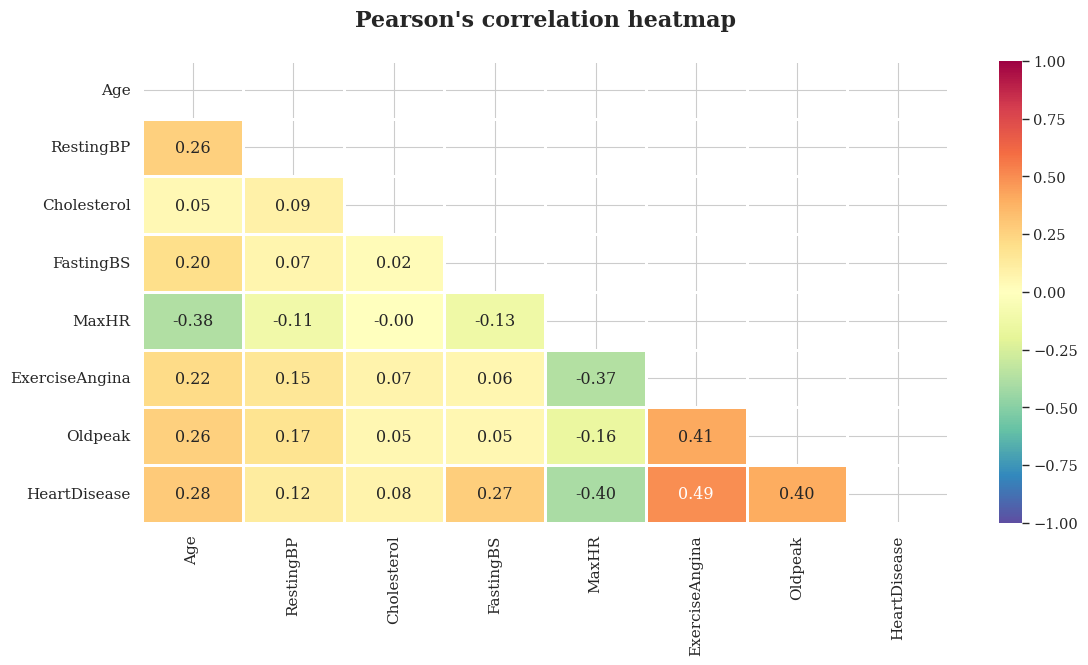

In [966]:
corr_matrix = df[num_feats].corr()

#maska pozwoli nam na wyplot połowy heatmapy (wartości nie będą zdublowane -
#ones_like tworzy macierz wartości bool, f-cja triu zmienia True na False diagonalnie)

mask = np.triu (np.ones_like(corr_matrix, dtype = bool))

fig= plt.figure (figsize = (13,6))

#tworzymy heatmapę

sns.heatmap (corr_matrix,
             annot = True, fmt = '.2f',
             linewidths = 2, linecolor = 'white',
             vmin = -1, vmax = 1,
             cmap = 'Spectral_r',
             mask = mask), #maska żeby była widoczna tylko połowa

ax.grid(False)
plt.xticks (fontname = 'serif', fontsize = 11, rotation = 90)
plt.yticks (fontname = 'serif', fontsize = 11, rotation = 0)
plt.title ("Pearson's correlation heatmap", fontsize = 16, fontweight = "bold", fontname = 'serif', pad = 25)

plt.show()

W macierzy korelacji występują wartości w przedziale od -0.5 do +0.5, czyli kategorie "brak związku", "słaby związek" oraz  "umiarkowany związek":

- **Age**- Brak związku z Cholesterol (0.05), występują słabe związki dodatnie z RestingBP (0.26), FastingBS (0.20), ExerciseAngina (0.22), Oldpeak (0.26) i zmienną celu HeartDisease (0.28). Najsilniejsza korelacja jaka występuje to korelacja ujemna z MaxHR (-0.38), co oznacza, że im osoba jest starsza, tym ma niższe tętno wysiłkowe.
- **RestingBP**- Brak związku z Cholesterol (0.09) i FastingBS (0.07).Słabe związki ujemne z MaxHR (-0.11), dodatnie z ExerciseAngina (0.15), Oldpeak (0.17), Age (0.26) i HeartDisease (0.12).
- **Cholesterol**- Brak związku ze wszystkimi zmiennymi- Age (0.05), RestingBP (0.09), FastingBS (0.02), MaxHR (-0.00), ExerciseAngina (0.07), Oldpeak (0.05), HeartDisease (0.08).
- **FastingBS**- Brak związku z RestingBP (0.07), Cholesterol (0.02), ExerciseAngina (0.06) i Oldpeak (0.05). Słabe związki ujemne z MaxHR (-0.13) oraz dodatnie z Age (0.20) i HeartDisease (0.27).
- **MaxHR**- Brak związku z Cholesterol (-0.00), słaby związek ujemny z RestingBP (-0.11), FastingBS (-0.13) i Oldpeak (-0,16) oraz umiarkowane związki ujemne z Age (-0.38), ExerciseAngina (-0.37) i HeartDisease (-0.40), co oznacza, że osoby o wyższym tętnie wysiłkowym (młodsze i wysportowane) umiarkowanie rzadziej doznają bólu podczas ćwiczeń i chorób serca.
- **ExerciseAngina**- Brak związku z Cholesterol (0.07) i FastingBS (0.06). Słabe związki dodatnie z Age (0.22) i RestingBP (0.15). Umiarkowane związki ujemne z MaxHR (-0.37) i dodatnie z Oldpeak (0.41) oraz HeartDisease (0.49), co oznacza, że ból podczas ćwiczeń umiarkowanie częściej dotyka osób o niższym tętnie wysiłkowym (niewysportowanych i starszych), jak również przejawiających symptomy choroby wieńcowej i chorób serca.
- **Oldpeak**- Brak związku z Cholesterol (0.05) i FastingBS (0.05). Słabe związki- dodatni z RestingBP (0.17) i Age (0.26) oraz ujemny z MaxHR (-0.16). Umiarkowany związek dodatni z ExerciseAngina (0.41) i HeartDisease (0.40), co oznacza że obniżenie odcinka ST podczas EKG wysiłkowego jest umiarkowanie powiązane z bólem w klatce piersiowej i chorobami serca.
- **HeartDisease**- Brak związku z Cholesterol (0.08). Występują słabe związki z RestingBP (0.12), Age (0.28) FastingBS (0.27). Występują korelacje umiarkowane: ujemna z MaxHR (-0.40), dodatnie z ExerciseAngina (0.49) i Oldpeak (0.40), co oznacza, że choroba serca umiarkowanie częściej dotyka osób z niższym tętnem wysiłkowym, jak również z bólem w klatce piersiowej podczas ćwiczeń i ryzykiem choroby wieńcowej.

**Podsumowanie:**

**Cholesterol** jako jedyna zmienna, wykazuje brak liniowej kolelacji z pozostałymi zmiennymi. Nie oznacza to jednak, że nie zachodzi korelacja nieliniowa. Dlatego kolumna **Cholesterol** zostanie przyjęta do dalszych obliczeń.

## EDA- podsumowanie

- W datasecie nie odnaleziono cech, które możnaby uznać za nieistotne.
- W datasecie nie ma brakujących wartości.

- Dane ilościowe:

 - Wartości niepoprawne (0) dla **RestingBP** i **Cholesterol** zostały uzupełnione na etapie "First sight of data".
 - W kolumnach **RestingBP**, **Cholesterol**, **MaxHR** i **Oldpeak** zidentyfikowano wartości odstające (outliers).
 - Rozkłady danych ilościowych, poza **Cholesterol** i **Oldpeak**, są zbliżone do rozkładu normalnego.
 - **Age**, **MaxHR** oraz **Oldpeak** wydają się być najbardziej istotnymi predyktorami choroby serca. **Cholesterol** oraz **RestingBP** wykazują mniej wyraźne różnice, co może wskazywać, że ich znaczenie jako predyktorów może być ograniczone.

- Dane jakościowe:

 - W zbiorze znajduje się nadreprezentacja mężczyzn.
 - Wszystkie zmienne jakościowe wydają się być ważnymi predyktorami choroby serca.


- Zmienne ilościowe, które powinny zostać przekształcone:
 - **Age** (binning)- proponowane kategorie: Young (28- 35), Middle_1 (36-46), Middle_2 (47-60), Old (61-70), V_Old (71-77), następnie kodowanie z użyciem OrdinalEncoder,
 - **RestingBP** (binning)- proponowane kategorie: Normal (< 120), Elevated (120-139), H_bl_press_1 (140-159), H_bl_press_2 ( > 160), następnie kodowanie z użyciem OrdinalEncoder,
 - **Cholesterol** (binning)- proponowane kategorie:  Optimal (< 200), Elevated (201-240), High (241-300), (V_High > 301), następnie kodowanie z użyciem OrdinalEncoder,
 - **maxHR** (skalowanie)- rozkład zmiennej jest zbliżony do rozkładu normalnego, więc skalowanie zostanie przeprowadzone z użyciem StandardScaler,
 - **Oldpeak** (binning)- proponowane kategorie: Optimal (0), L_Risk (0-1), Risk (-2.6-0), M_Risk (1-2), H_Risk ( > 2), następnie kodowanie z użyciem OrdinalEncoder.


- Zmienne jakościowe, które powinny zostać przekształcone:
  - **Sex**- kodowanie z użyciem LabelEncoder,
  - **ChestPainType**- kodowanie z użyciem OrdinalEncoder: NAP < ATA < ASY < TA,
  - **FastingBS**- zmienna przyjmuje wartości 0, 1- nie wymaga kodowania,
  - **RestingECG**- kodowanie z użyciem OrdinalEncoder: Normal < ST < LVH,
  - **ExerciseAngina**- zmienna została zakodowana do wartości 0, 1 ne etapie "First sight of data",
  - **ST_Slope**- kodowanie z użyciem OrdinalEncoder: Up < Flat < Down
  - **HeartDisease**- zmienna przyjmuje wartości 0, 1- nie wymaga kodowania.

# Wstępne przetwarzanie danych (Data Preprocessing)

In [967]:
def outliers (x):
    iqr = x.quantile (0.75) - x.quantile (0.25)
    lower = x.quantile (0.25) - 1.5 * iqr
    upper = x.quantile (0.75) + 1.5 * iqr

    x = x.clip(lower = lower, upper = upper)
    return x

In [968]:
df_proc = df.copy()

## Usunięcie nieistotnych cech (Irrelevant features removal)

Nie stwierdzono występowania cech nieistotnych.

## Identyfikacja brakujących wartości (Missing values identyfication)

Wartości niepoprawne (0) dla kolumn **RestingBP** i **Cholesterol** zostały uzupełnione na etapie "First sight of data".

## Usunięcie wartości odstających (Outliers clipping)

In [969]:
df_proc['RestingBP'] = outliers(df_proc['RestingBP'])
df_proc['Cholesterol'] = outliers(df_proc['Cholesterol'])
df_proc['MaxHR'] = outliers(df_proc['MaxHR'])
df_proc['Oldpeak'] = outliers(df_proc['Oldpeak'])

Sprawdzenie usunięcia wartości odstających:

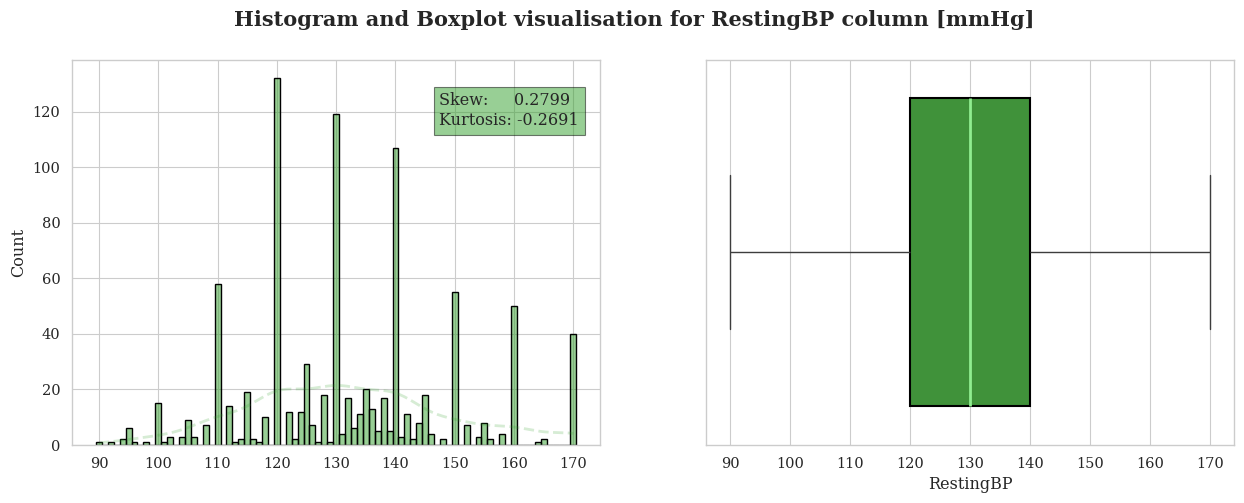

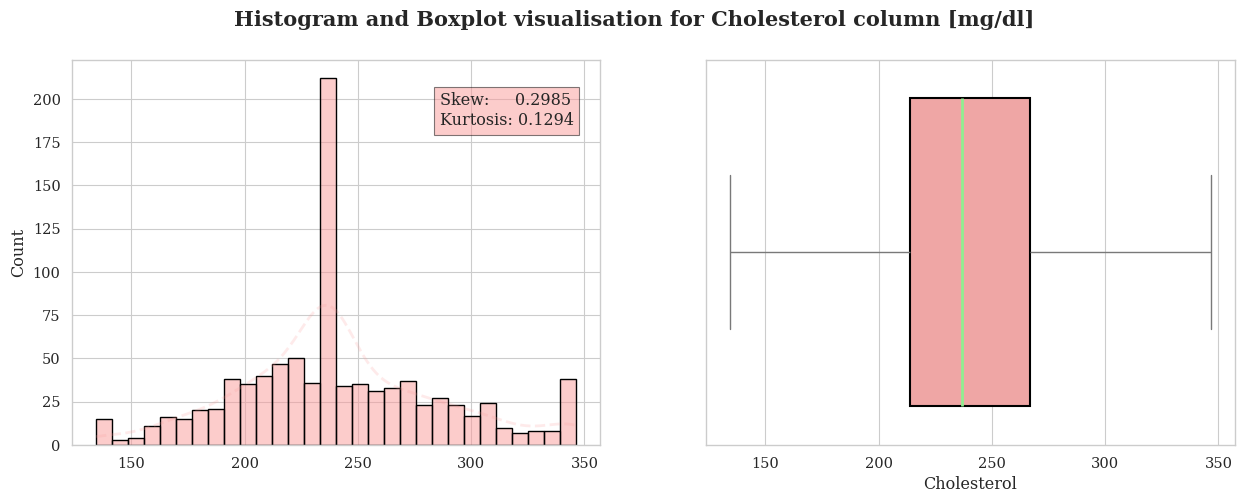

,count,mean,std,min,25%,50%,75%,max,RSD
Cholesterol,918.0,241.227124,45.069895,134.5,214.0,237.0,267.0,346.5,18.68


In [970]:
hist_box (df_proc['RestingBP'])
hist_box (df_proc['Cholesterol'])

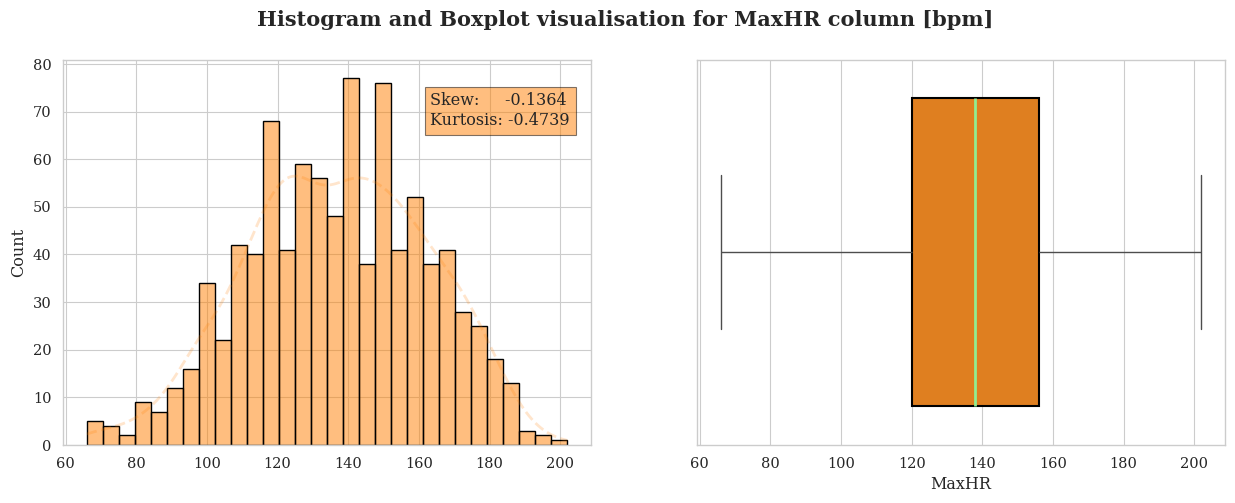

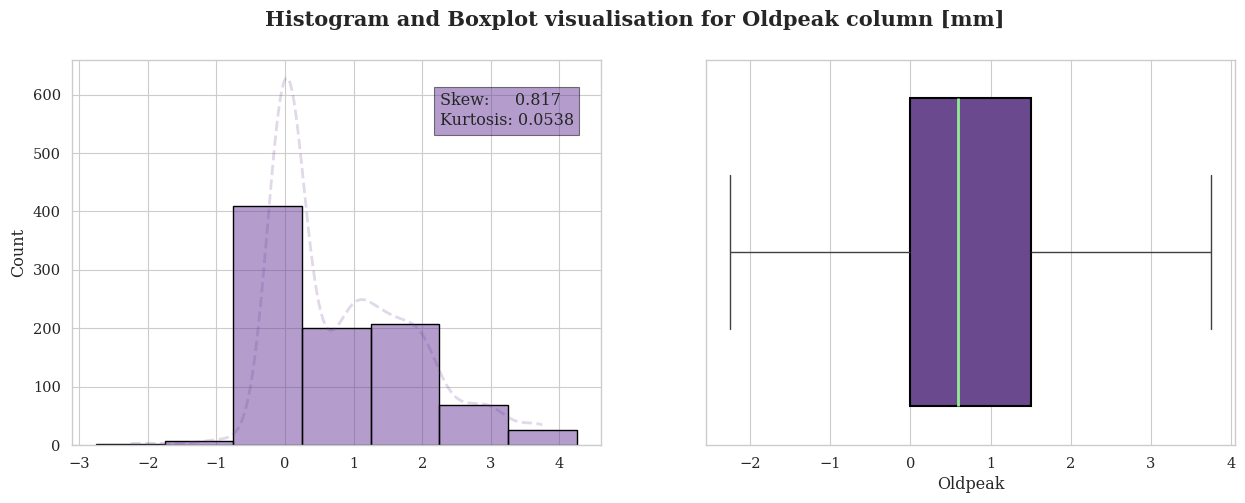

,count,mean,std,min,25%,50%,75%,max,RSD
Oldpeak,918.0,0.877778,1.031693,-2.25,0.0,0.6,1.5,3.75,117.53


In [971]:
hist_box (df_proc['MaxHR'])
hist_box (df_proc['Oldpeak'])

W wyniku usunięcia wartości odstających parametry skośności i kurtozy poprawiły sie dla wszystkich kolumn poddanych działaniom.

## Przekształcenie zmiennych ciągłych (danych ilościowych)

**Age** (binning)- ostateczne kategorie: Young (28- 35), Middle_1 (36-46), Middle_2 (47-60), Old (61-69), V_Old (70-77). W ten sposób powstanie nowa zmienna kategoryczna o charakterze porządkowym

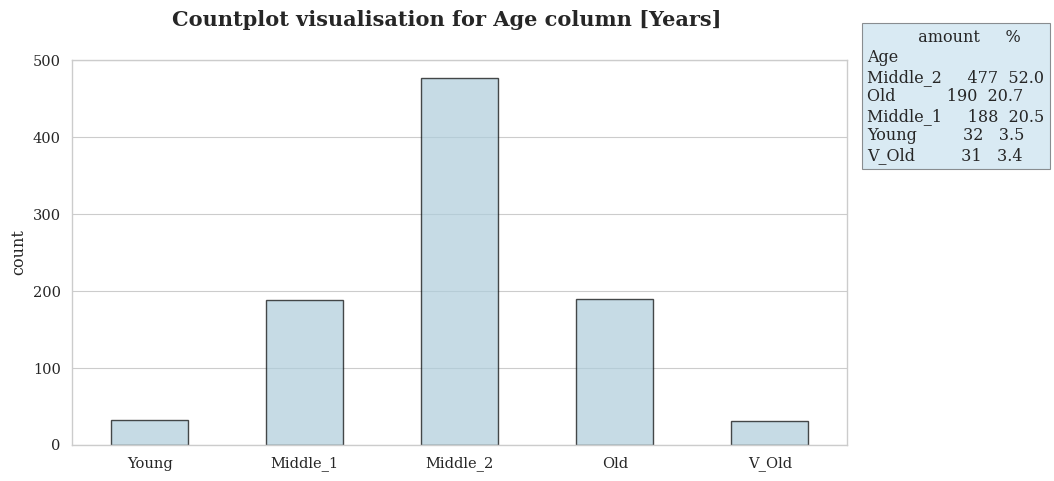

,count,unique,values
Age,918,5,Years


In [972]:
df_proc['Age'] = pd.cut(df_proc['Age'], bins = (0, 35, 46, 60, 69, np.inf), labels = ['Young', 'Middle_1', 'Middle_2', 'Old', 'V_Old'])
df_proc['Age'].unique()

hist_box (df_proc['Age'])

**RestingBP** (binning)- kategorie: Normal (< 120), Elevated (120-139), H_bl_press_1 (140-159), H_bl_press_2 (> 160). W ten sposób powstanie nowa zmienna kategoryczna o charakterze porządkowym.

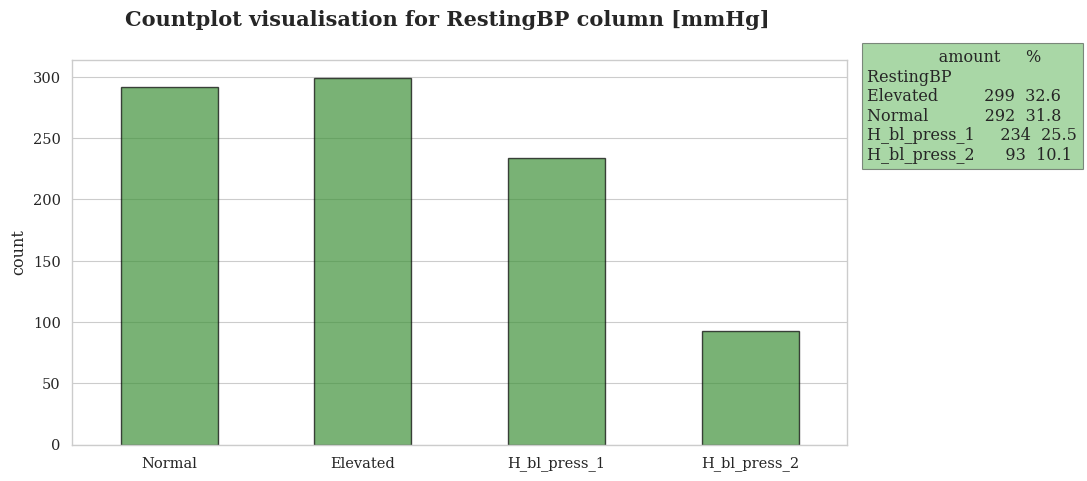

,count,unique,values
RestingBP,918,4,mmHg


In [973]:
df_proc['RestingBP'] = pd.cut(df_proc['RestingBP'], bins = (0, 120, 139, 159, np.inf),
                                  labels = ['Normal', 'Elevated', 'H_bl_press_1', 'H_bl_press_2'])
df_proc['RestingBP'].unique()
hist_box (df_proc['RestingBP'])

**Cholesterol** (binning)- ostateczne kategorie: Optimal (< 200), Elevated (201-240), High (241-290), (V_High > 291). W ten sposób powstanie nowa zmienna kategoryczna o charakterze porządkowym

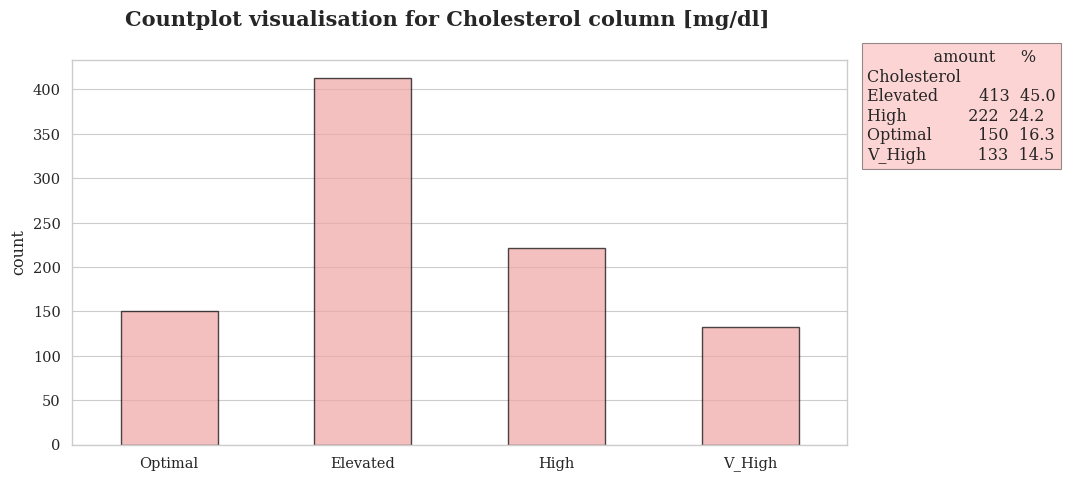

,count,unique,values
Cholesterol,918,4,mg/dl


In [974]:
df_proc['Cholesterol'] = pd.cut(df_proc['Cholesterol'], bins = (0, 200, 240, 290, np.inf),
                                  labels = ['Optimal', 'Elevated', 'High', 'V_High'])
df_proc['Cholesterol'].unique()
hist_box (df_proc['Cholesterol'])

**maxHR**- skalowanie z użyciem StandardScaler

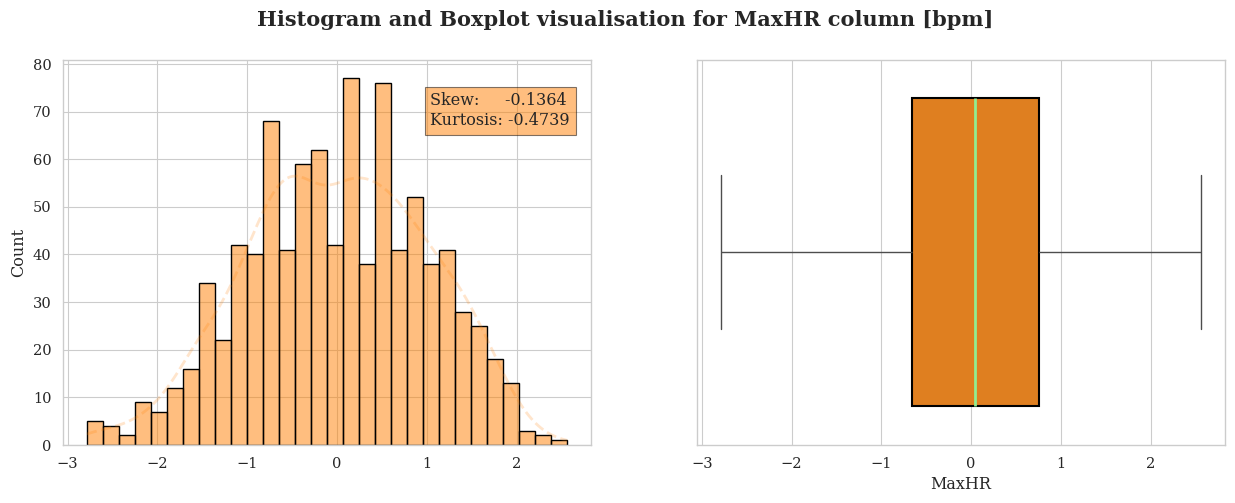

,count,mean,std,min,25%,50%,75%,max,RSD
MaxHR,918.0,-2.322035e-16,1.000545,-2.78616,-0.661698,0.046456,0.75461,2.564337,-4.308915e+17


In [975]:
ssc = StandardScaler()
df_proc['MaxHR'] = ssc.fit_transform (df_proc[['MaxHR']])
hist_box (df_proc['MaxHR'])

**Oldpeak** (binning)- kategorie: Optimal (0), L_Risk (0-1), Risk (-2.6-0), M_Risk (1-2), H_Risk ( > 2). Ponieważ ujemne wartości oznaczają przeciążenie serca, wcześniejsze zawały lub innymi schorzeniami takimi jak zapalenie mięśnia sercowego czy wady zastawkowe, ostatecznie zostaną one zakwalifikowane do kategorii H_Risk. W ten sposób powstanie nowa zmienna kategoryczna o charakterze porządkowym.

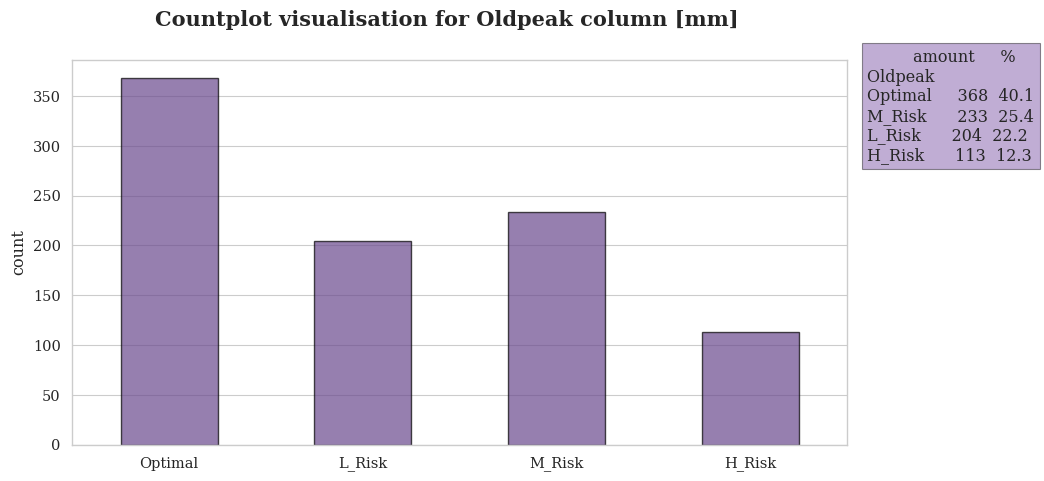

,count,unique,values
Oldpeak,918,4,mm


In [976]:
df_proc['Oldpeak'] = pd.cut(df_proc['Oldpeak'], bins = (-np.inf, -0.001, 0.001, 1, 2, np.inf),
                                  labels = ['Risk', 'Optimal', 'L_Risk','M_Risk', 'H_Risk'])

df_proc['Oldpeak'].replace ('Risk', 'H_Risk', inplace = True)

hist_box (df_proc['Oldpeak'])

## Przekształcenie zmiennych kategorycznych

Kolumny o kategorycznym charakterze danych:

In [977]:
df_proc_cat = df_proc.select_dtypes(exclude = np.number).columns.to_list()
df_proc_cat

['Age',
 'Sex',
 'ChestPainType',
 'RestingBP',
 'Cholesterol',
 'RestingECG',
 'Oldpeak',
 'ST_Slope']

**Age**- kodowanie OrdinalEncoderem

In [978]:
age_cat = ['Young', 'Middle_1', 'Middle_2', 'Old', 'V_Old']

ore = OrdinalEncoder (categories = [age_cat])

df_proc['Age'] = ore.fit_transform(df_proc[['Age']])
df_proc['Age'].unique()

array([1., 2., 0., 3., 4.])

**Sex**- kodowanie LabelEncoderem

In [979]:
le = LabelEncoder()
df_proc['Sex'] = le.fit_transform(df_proc['Sex'])
df_proc['Sex'].unique()

array([1, 0])

**ChestPainType**- kodowanie z użyciem OrdinalEncoder: NAP < ATA < ASY < TA

In [980]:
CPT_cat = ['NAP', 'ATA', 'ASY', 'TA']

ore = OrdinalEncoder (categories = [CPT_cat])

df_proc['ChestPainType'] = ore.fit_transform(df_proc[['ChestPainType']])
df_proc['ChestPainType'].unique()

array([1., 0., 2., 3.])

**RestingBP**- kodowanie OrdinalEncoderem

In [981]:
RBP_cat = ['Normal', 'Elevated', 'H_bl_press_1', 'H_bl_press_2']

ore = OrdinalEncoder (categories = [RBP_cat])

df_proc['RestingBP'] = ore.fit_transform(df_proc[['RestingBP']])
df_proc['RestingBP'].unique()

array([2., 3., 1., 0.])

**Cholesterol**- kodowanie OrdinalEncoderem

In [982]:
Chol_cat = ['Optimal', 'Elevated', 'High','V_High']

ore = OrdinalEncoder (categories = [Chol_cat])

df_proc['Cholesterol'] = ore.fit_transform(df_proc[['Cholesterol']])
df_proc['Cholesterol'].unique()

array([2., 0., 1., 3.])

**RestingECG**- kodowanie z użyciem OrdinalEncoder: Normal < ST < LVH

In [983]:
RECG_cat = ['Normal', 'ST', 'LVH']

ore = OrdinalEncoder (categories = [RECG_cat])

df_proc['RestingECG'] = ore.fit_transform(df_proc[['RestingECG']])
df_proc['RestingECG'].unique()

array([0., 1., 2.])

**Oldpeak**- kodowanie OrdinalEncoderem

In [984]:
Olp_cat =  ['Optimal', 'L_Risk', 'M_Risk', 'H_Risk']

ore = OrdinalEncoder (categories = [Olp_cat])

df_proc['Oldpeak'] = ore.fit_transform(df_proc[['Oldpeak']])
df_proc['Oldpeak'].unique()

array([0., 1., 2., 3.])

**ST_Slope**- kodowanie z użyciem OrdinalEncoder: Up < Flat < Down

In [985]:
STS_cat = ['Up', 'Flat', 'Down']

ore = OrdinalEncoder (categories = [STS_cat])

df_proc['ST_Slope'] = ore.fit_transform(df_proc[['ST_Slope']])
df_proc['ST_Slope'].unique()

array([0., 1., 2.])

## Podział na dane treningowe i testowe

In [986]:
df_pred = df_proc.copy()
#df_pred

### Stworzenie macierzy zmiennych uczących

In [987]:
X = df_pred.iloc [:,:-1]

### Stworzenie wektora zmiennej celu

In [988]:
y = df_pred.iloc [:,-1]

### Podział na zbiory treningowe i testowe

In [989]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state = 42, stratify = y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((734, 11), (184, 11), (734,), (184,))

# Budowanie modeli (Model Implementation)

In [1055]:
# funkcja zwracająca statystyki dokładności, precyzji i czułości
def results (name, y_train, y_train_pred, y_test, y_test_pred):

  acc_train = round(accuracy_score(y_train, y_train_pred), 3)
  acc_test = round(accuracy_score(y_test, y_test_pred), 3)
  prec_train = round(precision_score(y_train, y_train_pred), 3)
  prec_test = round(precision_score(y_test, y_test_pred), 3)
  rec_train = round(recall_score(y_train, y_train_pred), 3)
  rec_test = round(recall_score(y_test, y_test_pred), 3)
  f1_train = round(f1_score(y_train, y_train_pred), 3)
  f1_test = round(f1_score(y_test, y_test_pred), 3)
  roc_auc_train = round(roc_auc_score(y_train, y_train_pred), 3)
  roc_auc_test = round(roc_auc_score(y_test, y_test_pred), 3)
  rmse_train = round((np.sqrt(mean_squared_error(y_train, y_train_pred))), 4)
  rmse_test = round((np.sqrt(mean_squared_error(y_test, y_test_pred))), 4)

  results = pd.Series ({'AccurracyTrain': acc_train, 'AccuracyTest': acc_test,
                        'PrecisionTrain': prec_train, 'PrecisionTest': prec_test,
                        'RecallTrain': rec_train, 'RecallTest': rec_test,
                        'F1Train': f1_train, 'F1Test': f1_test,
                        'AUCTrain': roc_auc_train, 'AUCTest': roc_auc_test,
                        'RMSETrain': rmse_train,
                        'RMSETest': rmse_test}).to_frame(name = name)
  return results.transpose()

In [992]:
# funkcja dobierająca parametry do modelu
def model_parameters (model, param_grid, X_train, y_train, scoring = 'recall', n_splits = 3):

    cv = StratifiedKFold(n_splits = n_splits, shuffle = True, random_state = 0)

    model_grid = GridSearchCV(model, param_grid, cv = cv, scoring = scoring, n_jobs = -1)

    model_grid.fit(X_train, y_train)

    return model_grid.best_estimator_

## KNeighborsClassifier (K najbliższych sąsiadów) z parametrami domyślnymi

In [1056]:
# inicjalizacja modelu
knn = KNeighborsClassifier ()

# trenowanie modelu
knn.fit(X_train, y_train)

# predykcja
y_train_pred_knn = knn.predict(X_train)
y_test_pred_knn = knn.predict(X_test)

#statystyki
results_knn = results ('KNN', y_train, y_train_pred_knn, y_test, y_test_pred_knn)
results_knn


,AccurracyTrain,AccuracyTest,PrecisionTrain,PrecisionTest,RecallTrain,RecallTest,F1Train,F1Test,AUCTrain,AUCTest,RMSETrain,RMSETest
KNN,0.871,0.832,0.869,0.832,0.901,0.873,0.885,0.852,0.867,0.827,0.3598,0.4105


Osiągnięto czułość na poziomie 87%, przy precyzji 83% i dokładności 83%.

## KNeighborsClassifier (K najbliższych sąsiadów) z dostrojeniem hiperparametrów

In [994]:
knn_param_grid = {'n_neighbors': list(range(1, 20)),
                  'weights': ['uniform', 'distance'],
                  'p': [1, 2]}

best_knn = model_parameters (knn, knn_param_grid, X_train, y_train)
best_knn

KNeighborsClassifier(n_neighbors=17, p=1, weights='distance')

In [1057]:
# inicjalizacja modelu
best_knn = KNeighborsClassifier (leaf_size=1, p=1, n_neighbors=17, weights='distance')

# trenowanie modelu
best_knn.fit(X_train, y_train)

# predykcja
y_train_pred_best_knn = best_knn.predict(X_train)
y_test_pred_best_knn = best_knn.predict(X_test)

#statystyki
results_best_knn = results ('BestKNN', y_train, y_train_pred_best_knn, y_test, y_test_pred_best_knn)
results_best_knn

,AccurracyTrain,AccuracyTest,PrecisionTrain,PrecisionTest,RecallTrain,RecallTest,F1Train,F1Test,AUCTrain,AUCTest,RMSETrain,RMSETest
BestKNN,1.0,0.87,1.0,0.89,1.0,0.873,1.0,0.881,1.0,0.869,0.0,0.3612


Osiągnięto czułość na poziomie 87%, przy precyzji 89% i dokładności 87%. Zmniejszył się również błąd średni. Dostrojenie hiperparametrów nie miało wpływu na poziom czułości modelu, a podniosło jego dokładność i precyzję.

## Naive Bayes Classifier (Naiwny klasyfikator Bayesa)

### Gaussian Naive Bayes  z parametrami domyślnymi

In [1058]:
# inicjalizacja modelu GaussianNB
nb_gauss = GaussianNB ()

# trenowanie modelu
nb_gauss.fit(X_train, y_train)

# predykcja
y_train_pred_nb_gauss = nb_gauss.predict(X_train)
y_test_pred_nb_gauss = nb_gauss.predict(X_test)

#statystyki
results_nb_gauss = results ('GaussianNB', y_train, y_train_pred_nb_gauss, y_test, y_test_pred_nb_gauss)
results_nb_gauss

,AccurracyTrain,AccuracyTest,PrecisionTrain,PrecisionTest,RecallTrain,RecallTest,F1Train,F1Test,AUCTrain,AUCTest,RMSETrain,RMSETest
GaussianNB,0.839,0.853,0.86,0.871,0.847,0.863,0.854,0.867,0.838,0.852,0.401,0.3831


Osiągnięto czułość na poziomie 86%, przy precyzji 87% i dokładności 85%.

### Gaussian Naive Bayes z dostrojeniem hiperparametrów

In [997]:
nb_gauss_param_grid = {'var_smoothing': list(range(0, 50))}

best_nb_gauss = model_parameters (nb_gauss, nb_gauss_param_grid, X_train, y_train)
best_nb_gauss

GaussianNB(var_smoothing=14)

In [1059]:
# inicjalizacja modelu GaussianNB
best_nb_gauss = GaussianNB (var_smoothing=14)

# trenowanie modelu
best_nb_gauss.fit(X_train, y_train)

# predykcja
y_train_pred_best_nb_gauss = best_nb_gauss.predict(X_train)
y_test_pred_best_nb_gauss = best_nb_gauss.predict(X_test)

#statystyki
results_best_nb_gauss = results ('BestGaussianNB', y_train, y_train_pred_best_nb_gauss, y_test, y_test_pred_best_nb_gauss)
results_best_nb_gauss

,AccurracyTrain,AccuracyTest,PrecisionTrain,PrecisionTest,RecallTrain,RecallTest,F1Train,F1Test,AUCTrain,AUCTest,RMSETrain,RMSETest
BestGaussianNB,0.602,0.625,0.582,0.596,1.0,1.0,0.736,0.747,0.555,0.579,0.6307,0.6124


Osiągnięto czułość na poziomie 100%, przy precyzji 60% i dokładności 62%. Błąd średni zwiększył się o blisko połowę. Dostrojenie pogorszyło balans między czułością i precyzją. Model do odrzucenia.

### Bernoulli Naive Bayes z parametrami domyślnymi

In [1060]:
# inicjalizacja modelu BernoulliNB
nb_ber = BernoulliNB ()

# trenowanie modelu
nb_ber.fit(X_train, y_train)

# predykcja
y_train_pred_nb_ber = nb_ber.predict(X_train)
y_test_pred_nb_ber = nb_ber.predict(X_test)

#statystyki
results_nb_ber = results ('BernoulliNB', y_train, y_train_pred_nb_ber, y_test, y_test_pred_nb_ber)
results_nb_ber

,AccurracyTrain,AccuracyTest,PrecisionTrain,PrecisionTest,RecallTrain,RecallTest,F1Train,F1Test,AUCTrain,AUCTest,RMSETrain,RMSETest
BernoulliNB,0.83,0.821,0.85,0.842,0.84,0.833,0.845,0.837,0.828,0.819,0.4127,0.4235


Osiągnięto czułość na poziomie 83%, przy precyzji 84% i dokładności 82%.

### Bernoulli Naive Bayes z dostrojeniem hiperparametrów

In [1000]:
nb_ber_param_grid = {'alpha': list(range(0, 20)),
                     'force_alpha': [True, False],
                     'fit_prior': [True, False]}

best_nb_ber = model_parameters (nb_ber, nb_ber_param_grid, X_train, y_train)
best_nb_ber

BernoulliNB(alpha=14)

In [1061]:
# inicjalizacja modelu BernoulliNB
best_nb_ber = BernoulliNB (alpha=14)

# trenowanie modelu
best_nb_ber.fit(X_train, y_train)

# predykcja
y_train_pred_best_nb_ber = best_nb_ber.predict(X_train)
y_test_pred_best_nb_ber = best_nb_ber.predict(X_test)

#statystyki
results_best_nb_ber = results ('BestBernoulliNB', y_train, y_train_pred_best_nb_ber, y_test, y_test_pred_best_nb_ber)
results_best_nb_ber

,AccurracyTrain,AccuracyTest,PrecisionTrain,PrecisionTest,RecallTrain,RecallTest,F1Train,F1Test,AUCTrain,AUCTest,RMSETrain,RMSETest
BestBernoulliNB,0.831,0.815,0.844,0.827,0.852,0.843,0.848,0.835,0.829,0.812,0.411,0.4299


Osiągnięto czułość na poziomie 84%, przy precyzji 83% i dokładności 82%. Zmniejszył się również błąd średni. Dostrojenie hiperparametrów minimalnie podniosło poziom czułość modelu, jednocześnie obniżając jego precyzję i zwiększając błąd średni.

## Decision Tree Classifier (Drzewa decyzyjne) z parametrami domyślnymi

In [1062]:
# inicjalizacja modelu DecisionTreeClassifier
dtc = DecisionTreeClassifier()

# trenowanie modelu
dtc.fit(X_train, y_train)

# predykcja
y_train_pred_dtc = dtc.predict(X_train)
y_test_pred_dtc = dtc.predict(X_test)

#statystyki
results_dtc = results ('DecisionTree', y_train, y_train_pred_dtc, y_test, y_test_pred_dtc)
results_dtc

,AccurracyTrain,AccuracyTest,PrecisionTrain,PrecisionTest,RecallTrain,RecallTest,F1Train,F1Test,AUCTrain,AUCTest,RMSETrain,RMSETest
DecisionTree,1.0,0.826,1.0,0.843,1.0,0.843,1.0,0.843,1.0,0.824,0.0,0.417


Osiągnięto czułość na poziomie 81%, przy precyzji 84% i dokładności 81%.

## Decision Tree Classifier (Drzewa decyzyjne) z dostrojeniem hiperparametrów

In [1003]:
dtc_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2,3],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2]}

best_dtc = model_parameters (dtc, dtc_param_grid, X_train, y_train)
best_dtc

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [1063]:
# inicjalizacja modelu DecisionTreeClassifier
best_dtc = DecisionTreeClassifier(criterion='entropy', max_depth=3)

# trenowanie modelu
best_dtc.fit(X_train, y_train)

# predykcja
y_train_pred_best_dtc = best_dtc.predict(X_train)
y_test_pred_best_dtc = best_dtc.predict(X_test)

#statystyki
results_best_dtc = results ('BestDecisionTree', y_train, y_train_pred_best_dtc, y_test, y_test_pred_best_dtc)
results_best_dtc

,AccurracyTrain,AccuracyTest,PrecisionTrain,PrecisionTest,RecallTrain,RecallTest,F1Train,F1Test,AUCTrain,AUCTest,RMSETrain,RMSETest
BestDecisionTree,0.85,0.804,0.846,0.806,0.892,0.853,0.868,0.829,0.845,0.798,0.3871,0.4423


Osiągnięto czułość na poziomie 85%, przy precyzji 80% i dokładności 80%. Dostrojenie hiperparametrów zwiększyło poziom czułości, obniżyło poziom pozostałych parametrów modelu i zwiększyło błąd średni.

## Random Forest Classifier (Las drzew losowych) z parametrami domyślnymi

In [1064]:
# inicjalizacja modelu RandomForestClassifier
rfc = RandomForestClassifier()

# trenowanie modelu
rfc.fit(X_train, y_train)

# predykcja
y_train_pred_rfc = rfc.predict(X_train)
y_test_pred_rfc = rfc.predict(X_test)

#statystyki
results_rfc = results ('RandomForest', y_train, y_train_pred_rfc, y_test, y_test_pred_rfc)
results_rfc

,AccurracyTrain,AccuracyTest,PrecisionTrain,PrecisionTest,RecallTrain,RecallTest,F1Train,F1Test,AUCTrain,AUCTest,RMSETrain,RMSETest
RandomForest,1.0,0.886,1.0,0.879,1.0,0.922,1.0,0.9,1.0,0.882,0.0,0.3378


Osiągnięto czułość na poziomie 92%, przy precyzji 87% i dokładności 88%.

## Random Forest Classifier (Las drzew losowych) z dostrojeniem hiperparametrów

In [1065]:
rfc_param_grid = {'n_estimators': [10, 30, 50, 70, 100],
                  'criterion': ['gini', 'entropy'],
                  'max_depth': [2, 3, 4],
                  'min_samples_split': [2, 3, 4, 5],
                  'min_samples_leaf': [1, 2, 3],
                  'bootstrap': [True, False]}

best_rfc = model_parameters (rfc, rfc_param_grid, X_train, y_train)
best_rfc

RandomForestClassifier(bootstrap=False, max_depth=2, min_samples_leaf=2,
                       n_estimators=10)

In [1066]:
# inicjalizacja modelu RandomForestClassifier
best_rfc = RandomForestClassifier(max_depth=2, min_samples_split=4, n_estimators=10)

# trenowanie modelu
best_rfc.fit(X_train, y_train)

# predykcja
y_train_pred_best_rfc = best_rfc.predict(X_train)
y_test_pred_best_rfc = best_rfc.predict(X_test)

#statystyki
results_best_rfc = results ('BestRandomForest', y_train, y_train_pred_best_rfc, y_test, y_test_pred_best_rfc)
results_best_rfc

,AccurracyTrain,AccuracyTest,PrecisionTrain,PrecisionTest,RecallTrain,RecallTest,F1Train,F1Test,AUCTrain,AUCTest,RMSETrain,RMSETest
BestRandomForest,0.841,0.859,0.831,0.873,0.894,0.873,0.861,0.873,0.834,0.857,0.3992,0.3759


Osiągnięto czułość na poziomie 86%, przy precyzji 87% i dokładności 85%. Dostrojenie hiperparametrów obniżyło poziom wszystkich parametrów modelu i zwiększyło błąd średni.

## Logistic Regression (Regresja logistyczna) z parametrami domyślnymi

In [1067]:
# inicjalizacja modelu LogisticRegression
lr = LogisticRegression()

# trenowanie modelu
lr.fit(X_train, y_train)

# predykcja
y_train_pred_lr = lr.predict(X_train)
y_test_pred_lr = lr.predict(X_test)

#statystyki
results_lr = results ('LogisticRegression', y_train, y_train_pred_lr, y_test, y_test_pred_lr)
results_lr

,AccurracyTrain,AccuracyTest,PrecisionTrain,PrecisionTest,RecallTrain,RecallTest,F1Train,F1Test,AUCTrain,AUCTest,RMSETrain,RMSETest
LogisticRegression,0.85,0.832,0.857,0.845,0.874,0.853,0.866,0.849,0.847,0.829,0.3871,0.4105


Osiągnięto czułość na poziomie 85%, przy precyzji 84% i dokładności 83%.

## Logistic Regression (Regresja logistyczna) z dostrojeniem hiperparametrów

In [1009]:
lr_param_grid = {'penalty': ['l1','l2','elasticnet','None'],
                  'class_weight': ['balanced', None]}

best_lr = model_parameters (lr, lr_param_grid, X_train, y_train)
best_lr

LogisticRegression()

Najlepsze parametry modelu osiągnięto dla parametrów domyślnych.

## Support Vector machine SVC (Maszyna wektorów nośnych) z parametrami domyślnymi

In [1068]:
# inicjalizacja modelu SVC
svc = SVC(probability = True)

# trenowanie modelu
svc.fit(X_train, y_train)

# predykcja
y_train_pred_svc = svc.predict(X_train)
y_test_pred_svc = svc.predict(X_test)

#statystyki
results_svc = results ('SVC', y_train, y_train_pred_svc, y_test, y_test_pred_svc)
results_svc

,AccurracyTrain,AccuracyTest,PrecisionTrain,PrecisionTest,RecallTrain,RecallTest,F1Train,F1Test,AUCTrain,AUCTest,RMSETrain,RMSETest
SVC,0.875,0.848,0.87,0.87,0.909,0.853,0.889,0.861,0.871,0.847,0.354,0.3901


Osiągnięto czułość na poziomie 85%, przy precyzji 87% i dokładności 85%.

## Support Vector machine SVC (Maszyna wektorów nośnych) z dostrojeniem hiperparametrów

In [1011]:
svc_param_grid =  {'C': [ 0.1, 0.5, 1, 5, 10],
                   'kernel': ['linear', 'rbf'],
                   'gamma': ['scale', 'auto'],
                   'degree': [2, 3, 4]}

best_svc = model_parameters (svc, svc_param_grid, X_train, y_train)
best_svc

SVC(C=0.5, degree=2, probability=True)

In [1069]:
# inicjalizacja modelu SVC
best_svc = SVC(C=0.5, degree=2, probability=True)

# trenowanie modelu
best_svc.fit(X_train, y_train)

# predykcja
y_train_pred_best_svc = best_svc.predict(X_train)
y_test_pred_best_svc = best_svc.predict(X_test)

#statystyki
results_best_svc = results ('BestSVC', y_train, y_train_pred_best_svc, y_test, y_test_pred_best_svc)
results_best_svc

,AccurracyTrain,AccuracyTest,PrecisionTrain,PrecisionTest,RecallTrain,RecallTest,F1Train,F1Test,AUCTrain,AUCTest,RMSETrain,RMSETest
BestSVC,0.871,0.842,0.868,0.861,0.904,0.853,0.885,0.857,0.867,0.841,0.3598,0.397


Osiągnięto czułość na poziomie 85%, przy precyzji 86% i dokładności 84%. Dostrojenie hiperparametrów obniżyło poziom parametrów modelu i zwiększyło błąd średni.

# Ocena i porównanie wydajności modeli

In [1073]:
 results_all = pd.concat([results_knn, results_best_knn, results_nb_gauss, results_best_nb_gauss,
                          results_nb_ber, results_best_nb_ber, results_dtc, results_best_dtc,
                          results_rfc, results_best_rfc, results_lr, results_svc, results_best_svc])
 results_all.sort_values(by = 'RecallTest', ascending = False)

,AccurracyTrain,AccuracyTest,PrecisionTrain,PrecisionTest,RecallTrain,RecallTest,F1Train,F1Test,AUCTrain,AUCTest,RMSETrain,RMSETest
BestGaussianNB,0.602,0.625,0.582,0.596,1.000,1.000,0.736,0.747,0.555,0.579,0.6307,0.6124
RandomForest,1.000,0.886,1.000,0.879,1.000,0.922,1.000,0.900,1.000,0.882,0.0000,0.3378
KNN,0.871,0.832,0.869,0.832,0.901,0.873,0.885,0.852,0.867,0.827,0.3598,0.4105
BestKNN,1.000,0.870,1.000,0.890,1.000,0.873,1.000,0.881,1.000,0.869,0.0000,0.3612
BestRandomForest,0.841,0.859,0.831,0.873,0.894,0.873,0.861,0.873,0.834,0.857,0.3992,0.3759
GaussianNB,0.839,0.853,0.860,0.871,0.847,0.863,0.854,0.867,0.838,0.852,0.4010,0.3831
BestDecisionTree,0.850,0.804,0.846,0.806,0.892,0.853,0.868,0.829,0.845,0.798,0.3871,0.4423
LogisticRegression,0.850,0.832,0.857,0.845,0.874,0.853,0.866,0.849,0.847,0.829,0.3871,0.4105
SVC,0.875,0.848,0.870,0.870,0.909,0.853,0.889,0.861,0.871,0.847,0.3540,0.3901
BestSVC,0.871,0.842,0.868,0.861,0.904,0.853,0.885,0.857,0.867,0.841,0.3598,0.3970


Najlepsze parametry osiągnęły modele:

**RandomForest**- model osiągnął parametr czułości na poziomie (zb. treningowy- zb.testowy) 100%- 92%, dokładności 100%- 89%, precyzji 100%- 88%, F1 100%- 90%, AUC 100%- 88%. Są to najlepsze wyniki dla każdej z metryk.

**BestKNN**- model osiągnął parametr czułości na poziomie (zb. treningowy- zb.testowy) 100%- 87%, dokładności 100%- 87%, precyzji 100%- 89%, F1 100%- 88%, AUC 100%- 87%. Są to drugie w kolejności wyniki metryk, zaraz po **RandomForest**.

**BestRandomForest**- model osiągnął parametr czułości na poziomie (zb. treningowy- zb.testowy) 89%- 87%, dokładności 84%- 86%, precyzji 83%- 87%, F1 86%- 87%, AUC 83%- 86%. Na uwagę zasługuje fakt, że model dla danych testowych osiąga większą zgodność, niż dla danych treningowych.

Pozostałe modele:

**GaussianNB**- model osiągnął parametr czułości na poziomie (zb. treningowy- zb.testowy) 85%- 86%, dokładności 84%- 85%, precyzji 86%- 87%, F1 85%- 87%, AUC 84%- 85%.

**SVC**- model osiągnął parametr czułości na poziomie (zb. treningowy- zb.testowy) 91%- 85%, dokładności 88%- 85%, precyzji 87%- 87%, F1 89%- 85%, AUC 87%- 85%. Osiągnął lepsze wyniki na zbiorze treningowym, jednak gorsze na zbiorze testowym.

**BestSVC**- model osiągnął parametr czułości na poziomie (zb. treningowy- zb.testowy) 90%- 85%, dokładności 87%- 84%, precyzji 87%- 86%, F1 88%- 86%, AUC 87%- 84%.

**KNN**- model osiągnął parametr czułości na poziomie (zb. treningowy- zb.testowy) 90%- 87%, dokładności 87%- 83%, precyzji 87%- 83%, F1 88%- 85%, AUC 87%- 83%.

**LogisticRegression**- model osiągnął parametr czułości na poziomie (zb. treningowy- zb.testowy) 87%- 85%, dokładności 85%- 83%, precyzji 86%- 84%, F1 87%- 85%, AUC 85%- 83%.

**BestDecisionTree**- model osiągnął parametr czułości na poziomie (zb. treningowy- zb.testowy) 89%- 85%, dokładności 85%- 80%, precyzji 85%- 81%, F1 87%- 83%, AUC 85%- 80%.

**BestBernoulliNB**- model osiągnął parametr czułości na poziomie (zb. treningowy- zb.testowy) 85%- 84%, dokładności 83%- 82%, precyzji 84%- 83%, F1 85%- 84%, AUC 83%- 81%.

**DecisionTree**- model osiągnął parametr czułości na poziomie (zb. treningowy- zb.testowy) 100%- 84%, dokładności 100%- 83%, precyzji 100%- 84%, F1 100%- 84%, AUC 100%- 82%. Model wykazuje cechy przeuczenia- znakomicie dopasował się do danych treningowych, jednak gorzej sobie radzi z danymi testowymi.

**BernoulliNB**- model osiągnął parametr czułości na poziomie (zb. treningowy- zb.testowy) 84%- 83%, dokładności 83%- 82%, precyzji 85%- 84%, F1 840%- 84%, AU C 83%- 82%.

**BestGaussianNB**- zarówno dla danych treningowych, jak i testowych osiągnął najwyższą wartość czułości 100%. Jednak dokładność 60%- 62%, precyzja 58%- 60%, F1 74%- 75% i AUC 56%- 58% są najniższymi wartościami spośród wszystkich modeli, co go zupełnie dyskwalifikuje. Jest to wynik zastosowania funkcji dopasowującej hiperparametry i jej determinacji dopasowania pod kątem metryki recall, co w efekcie popsuło model.


**Podsumowanie**

Spośród wszystkich zbudowanych modeli, najlepsze parametry ma **RandomForest**, zarówno dla danych treningowych (zgodność na poziomie 100%), jak i treningowych (zgodność na poziomie 88%- 92%).
